# MACHINE LEARNING - CLUSTERING ASSIGNMENT

## Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid

As a data analyst my job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the CEO to focus on the specific countries the most

## Methodologies Used:

- Exploratory Data Analysis
- Capping the outliers using the Inter-Quartile Range
- Scaling the data using MinMaxScaler
- Testing the Cluster Tendency using Hopkins Statistics
- Optimal number of Cluster using Elbow and Silhouette Methods 
- K - Means Clustering Algorithm
- Hierarchical Clustering 

## Contents

1. IMPORTING LIBRARIES
2. DATA LOADING & EVALUATION
3. EXPLORATORY DATA ANALYSIS
    1. UNIVARIATE ANALYSIS
    2. BIVARIATE ANALYSIS
    3. MUTLIVARIATE ANALYSIS
4. CAPPING THE OUTLIERS
5. SCALING THE DATA
6. CLUSTER TENDENCY MEASURE TEST
7. MODEL EVALUATION AND DETERMINING THE OPTIMAL NUMBER OF CLUSTERS 
    1. ELBOW METHOD
    2. SILHOUETTE METHOD
8. MODEL BUIDING
    1. K - MEANS CLUSTERING ALGORITHM
    2. HIERARCHICAL CLUSTERING ALGORITHM
        1. SINGLE LINKAGE HIERARCHICAL CLUSTERING ALGORITHM
        2. COMPLETE LINKAGE HIERARCHICAL CLUSTERING ALGORITHM
9. COMPARING THE ALGORITHM RESULTS
10. CONCLUSION

## Importing libraries

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings and set it to ignore
import warnings
warnings.filterwarnings("ignore")

First things first, we have imported the required libraries here, lets now load the dataset and evaluate it

In [2]:
# Creating a DF with all the above mentioned libraries with its version used

version = [['Numpy',np.__version__],['Pandas',pd.__version__],['Matplotlib',mpl.__version__],['Seaborn',sns.__version__]]
pack = pd.DataFrame(version,columns=['Package Name','Version'],index=[1,2,3,4])

pack

Package Name Version
1        Numpy  1.18.1
2       Pandas   1.0.5
3   Matplotlib   3.3.0
4      Seaborn  0.10.0

## Data Loading and Evaluating

In [3]:
# Reading the dataset with the name country and seeing the data

country = pd.read_csv("Country-data.csv",header=0)
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

While seeing the dataset initially, we could identify about ___10 columns___ including the ___1 column with the countries name___

In [4]:
# Evaluating the shape of the data

country.shape

(167, 10)

The dimension seems to be ___167 rows___ with ___10 columns___ 

In [5]:
# Evaluating the data types and count of non-null values in the dataset

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


___Most of the column___ seems to be ___numeric___ other than ___country___ which ___is an object___

In [6]:
# Evaluating the descriptive analysis of the DataFrame

country.describe(percentiles=[.25,.5,.75,.9,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

While seeing the descriptive analysis of the DF, we could see there are ___outliers___ in ___child_mort, exports, health, imports, income, inflation and gdpp___

In [7]:
# Checking if any null value found in the DF

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is ___no null values___ in any of the columns in the DF

In [8]:
# Checking if any country value has been adeed more than once

country.duplicated(subset=['country'],keep=False).sum()

0

___No duplicated values___ seen with the column country in the dataset

## Exploratory Data Analysis


Lets now understand the data better and do some kind of manipulation if needed as a part of Exploratory Data Analysis

In [9]:
# Checking the spellings of the countries name provided in the dataset

country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

Upon checking the values in the country column, there are ___no misspelling of the country name___ seen

In [10]:
# Changing the values of the below columns to make it as a full value with respect to gdp per capita

country['exports']=country['exports']*country['gdpp']/100
country['imports']=country['imports']*country['gdpp']/100
country['health']=country['health']*country['gdpp']/100

country.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

The Data dictionary showed that there are ___column values which are given as percentage per capita___. In order to make it as full  number for a particular country, we may need to do the above step

### Univariate Analysis


As a part of EDA, we will now see the individual elements given in the DF. 
Boxplots will show us the outliers and how well the data distributed across.


In [11]:
# Defining the function to use it for multiple purpose

def uniboxplot(data1):
    
    # Creating subplots to produce the plots simultaneously
    fig,axis = plt.subplots(3,3,figsize=(15,8))
    
    #Setting up the style and contexts
    fig.suptitle('country data'.upper(),weight='bold',fontsize=40)
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')
    
    #Plotting the boxplot 1 in the subplot with all the parameters required are passed
    plot1 = sns.boxplot(data=data1,x='child_mort', ax = axis[0,0],palette="Dark2")
    plot1.set_ylabel('Child Mortality'.upper())
    plot1.set_xlabel('')
    
    #Plotting the boxplot 2 in the subplot with all the parameters required are passed
    plot2 = sns.boxplot(data=data1,x='exports', ax = axis[0,1])
    plot2.set_ylabel('Exports'.upper())
    plot2.set_xlabel('')
    
    #Plotting the boxplot 3 in the subplot with all the parameters required are passed
    plot3 = sns.boxplot(data=data1,x='health', ax = axis[0,2],palette="Dark2")
    plot3.set_ylabel('health'.upper())
    plot3.set_xlabel('')
    
    #Plotting the boxplot 4 in the subplot with all the parameters required are passed
    plot4 = sns.boxplot(data=data1,x='imports', ax = axis[1,0])
    plot4.set_ylabel('imports'.upper())
    plot4.set_xlabel('')
    
    #Plotting the boxplot 5 in the subplot with all the parameters required are passed
    plot5 = sns.boxplot(data=data1,x='income', ax = axis[1,1],palette="Dark2")
    plot5.set_ylabel('income'.upper())
    plot5.set_xlabel('')
    
    #Plotting the boxplot 6 in the subplot with all the parameters required are passed
    plot6 = sns.boxplot(data=data1,x='inflation', ax = axis[1,2])
    plot6.set_ylabel('inflation'.upper())
    plot6.set_xlabel('')
    
    #Plotting the boxplot 7 in the subplot with all the parameters required are passed
    plot7 = sns.boxplot(data=data1,x='life_expec', ax = axis[2,0],palette="Dark2")
    plot7.set_ylabel('Life expectancy'.upper())
    plot7.set_xlabel('')
    
    #Plotting the boxplot 8 in the subplot with all the parameters required are passed
    plot8 = sns.boxplot(data=data1,x='total_fer', ax = axis[2,1])
    plot8.set_ylabel('Total Fertility'.upper())
    plot8.set_xlabel('')
    
    #Plotting the boxplot 9 in the subplot with all the parameters required are passed
    plot9 = sns.boxplot(data=data1,x='gdpp', ax = axis[2,2],palette="Dark2")
    plot9.set_ylabel('gdpp'.upper())
    plot9.set_xlabel('')


    plt.tight_layout()
    plt.show()

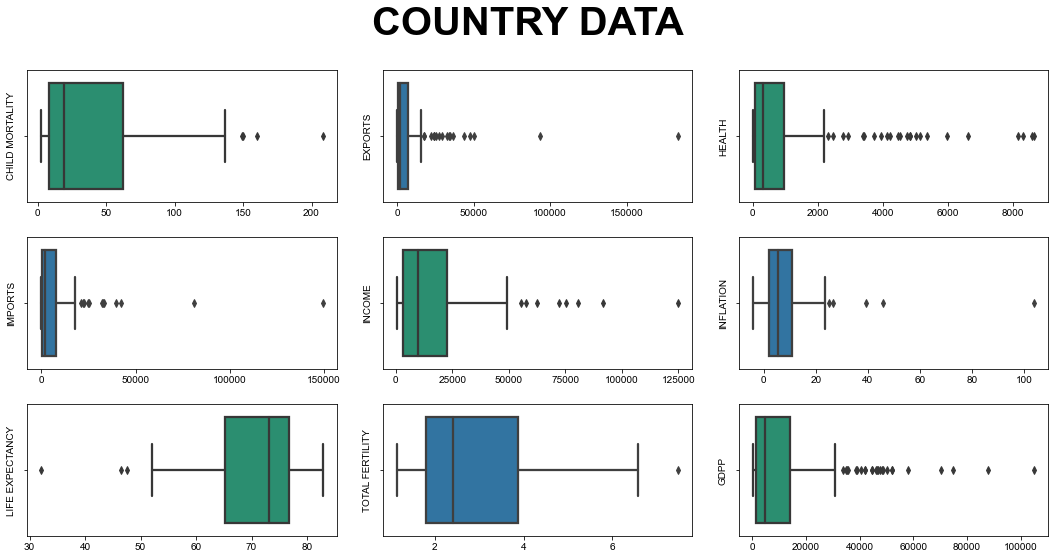

In [12]:
# # Passing the values in the funtion to get the output of box plot

uniboxplot(data1=country)

__Inferences from the above plot:__

    1. Child Mortality has the mean of 20 and range upto 140, there are outliers in the upper fencing
    2. Mean of 40 and range upto 85, there are outliers in the upper fencing in exports values column
    3. Health has the mean of 6 and range upto 13, there are outliers in the upper fencing
    4. Mean of 47 and range upto 100, there are outliers in the upper fencing in imports values column
    5. Income has the mean of 10k and range upto 50k, there are outliers in the upper fencing
    6. Mean of 7 and range upto 22, there are outliers in the upper fencing in inflation values column
    7. Life Expectancy has the mean of 73 and range upto 84, there are outliers in the lower fencing
    8. Mean of 2.5 and range upto 7, there is a outlier in the upper fencing in total fertility values column
    9. Gdpp has the mean of 7k and range upto 30k, there are outliers in the upper fencing

### Bivariate Analysis

Inferences can be made with the help of bar plots given below. For instance, we are taking here the countries based the top 10 and bottom 10 values respectively.


### Barplots

Here we define a function to plot the bar plots as many as we need in a single line of code

In [13]:
# Defining the function to make it use for multiple times when needed 

def bibarplot(by,ylabel,title):
    fig,ax=plt.subplots(ncols=2,nrows=1, figsize=(20,10))

    #Setting up the style and contexts
    fig.suptitle(title.upper(),weight='bold',fontsize=40)
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.axes_style('dark')

    #Plotting the barplot 1 in the subplot with all the parameters required are passed
    plot1=sns.barplot(data=country.sort_values(by=by).tail(10), x='country',y=by,ax=ax[0])
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=60)
    plot1.set_ylabel(ylabel.upper(),fontsize=20,weight='bold')
    plot1.set_xlabel('country'.upper(),fontsize=20,weight='bold')
    plot1.set_title("Countries with high ".upper()+ylabel.upper()+" values".upper())

    #Plotting the barplot 2 in the subplot with all the parameters required are passed
    plot2=sns.barplot(data=country.sort_values(by=by).head(10), x='country',y=by,ax=ax[1])
    plot2.set_xticklabels(plot2.get_xticklabels(),rotation=60)
    plot2.set_ylabel(''.upper(),fontsize=20,weight='bold')
    plot2.set_xlabel('country'.upper(),fontsize=20,weight='bold')
    plot2.set_title("Countries with low ".upper()+ylabel.upper()+" values".upper())
    
    plt.tight_layout()
    plt.show()

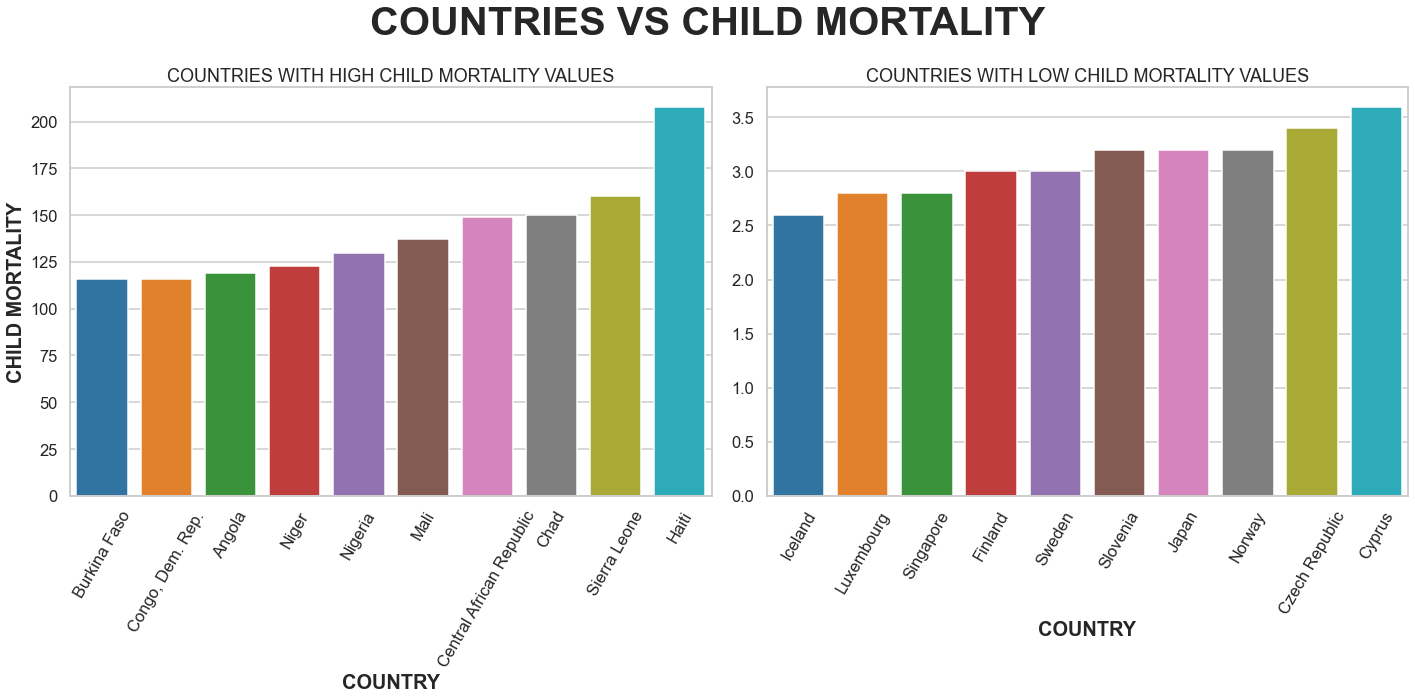

In [14]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='Child mortality',title='countries vs child mortality',by = 'child_mort')

__Inferences from the above plot:__

    1. Countries like Haiti, Sierra Leone , Chad are seen with higher child mortality rates, whereas Iceland, Luxembourg, Singapore are with lower mortality rates
    2. 200 is the highest score of mortality in the dataset, and 2.6 is the lowest

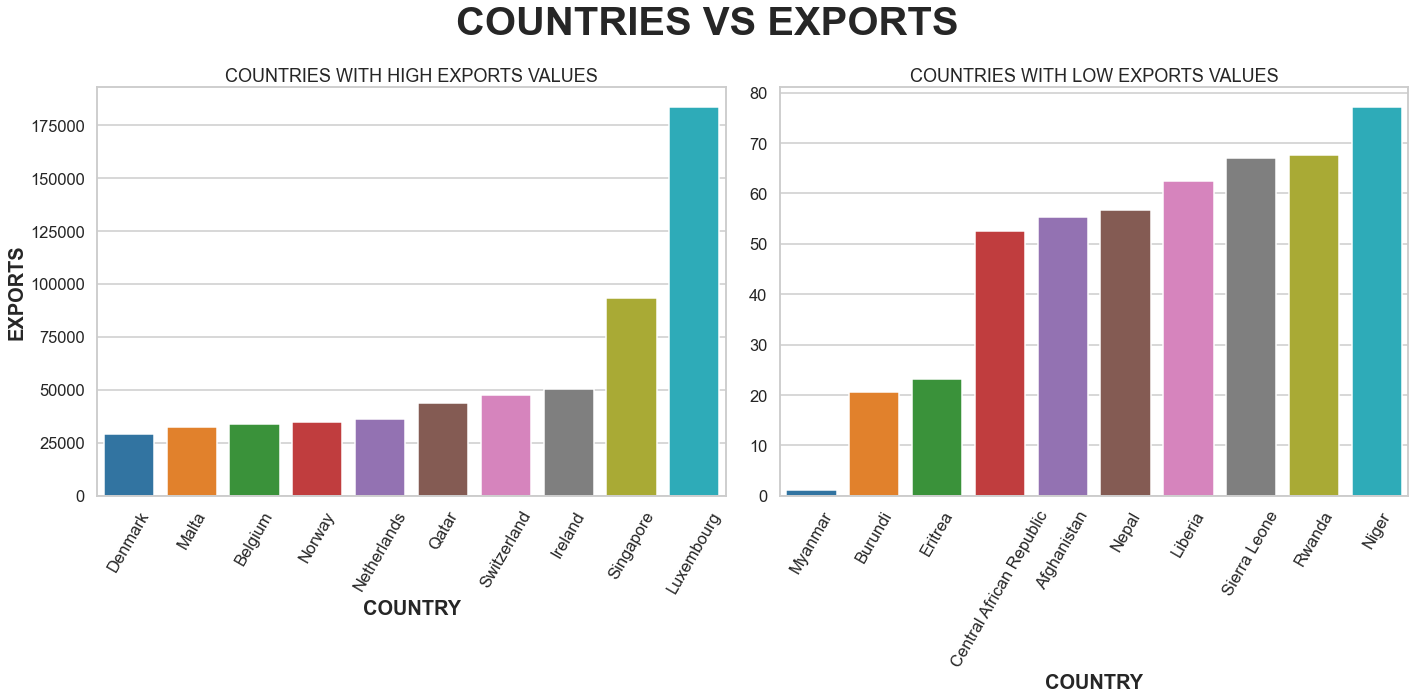

In [15]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='exports',title='countries vs exports',by='exports')

__Inferences from the above plot:__

    1. Countries like Luxembourg, Singapore , Ireland are seen with higher exports rates, whereas Myanmar, Burundi, Eritrea are with lower exports rates
    2. 175000 is the highest score of exports in the dataset, and 2 is the lowest

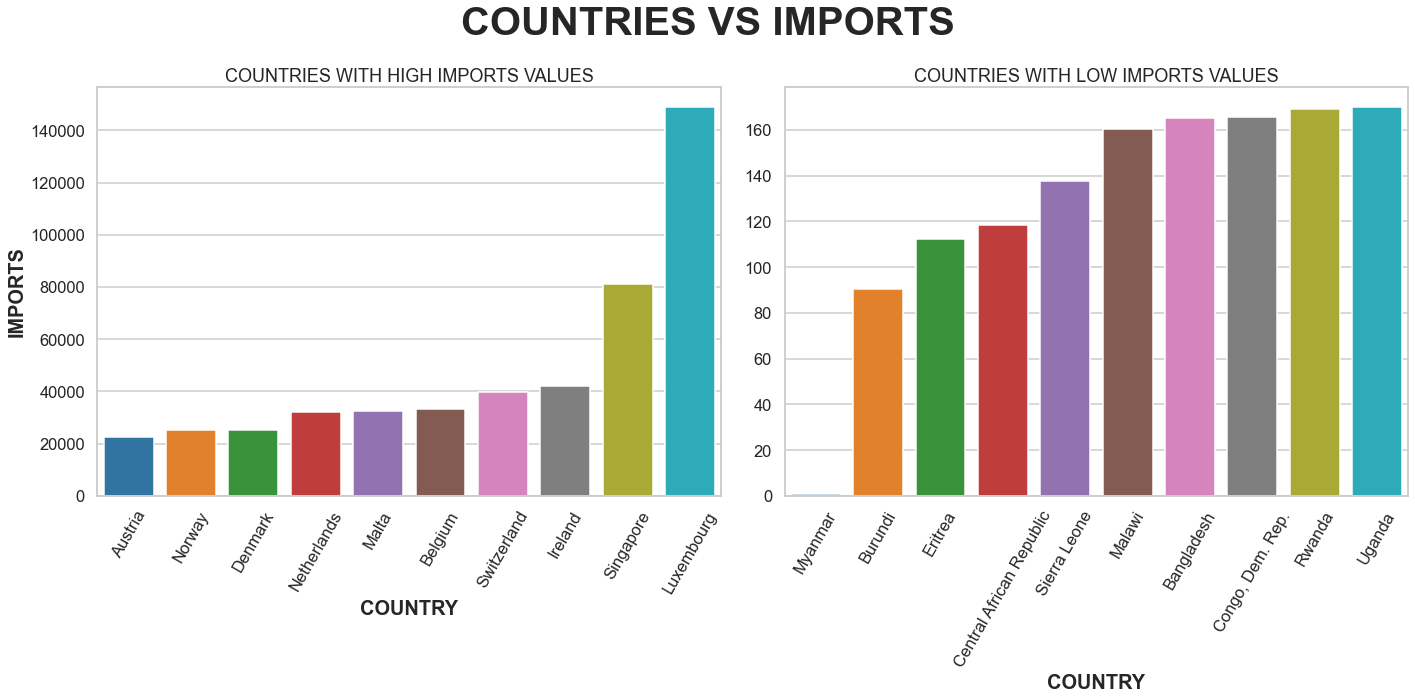

In [16]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='imports',title='countries vs imports',by='imports')

__Inferences from the above plot:__

    1. Countries like Luxembourg, Singapore , Ireland are seen with higher imports rates, whereas Myanmar, Burundi, Eritrea are with lower imports rates
    2. 150000 is the highest score of imports in the dataset, and 1 is the lowest

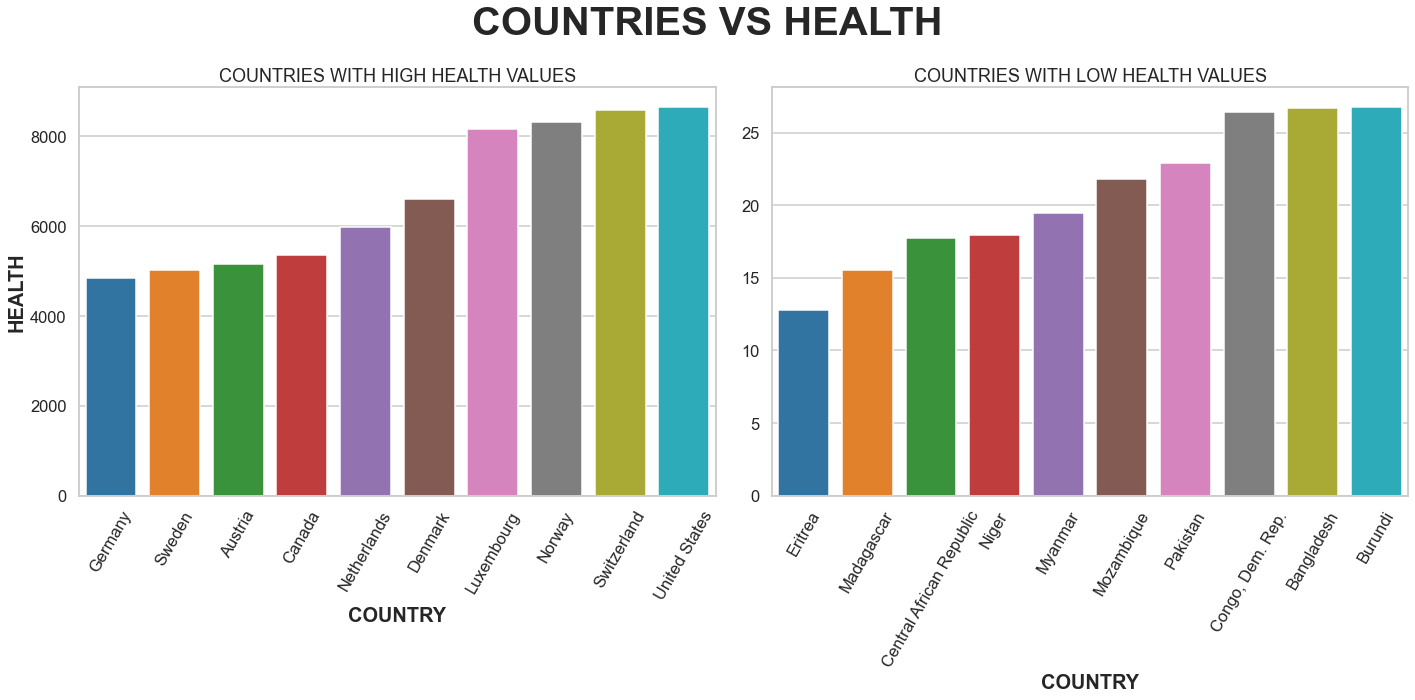

In [17]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='health',title='countries vs health',by='health')

__Inferences from the above plot:__

    1. Countries like United States, Switzerland , Norway are seen with higher health rates, whereas Eritrea, Madagascar, Central African Republic are with lower health rates
    2. 7000 is the highest score of health in the dataset, and 13 is the lowest

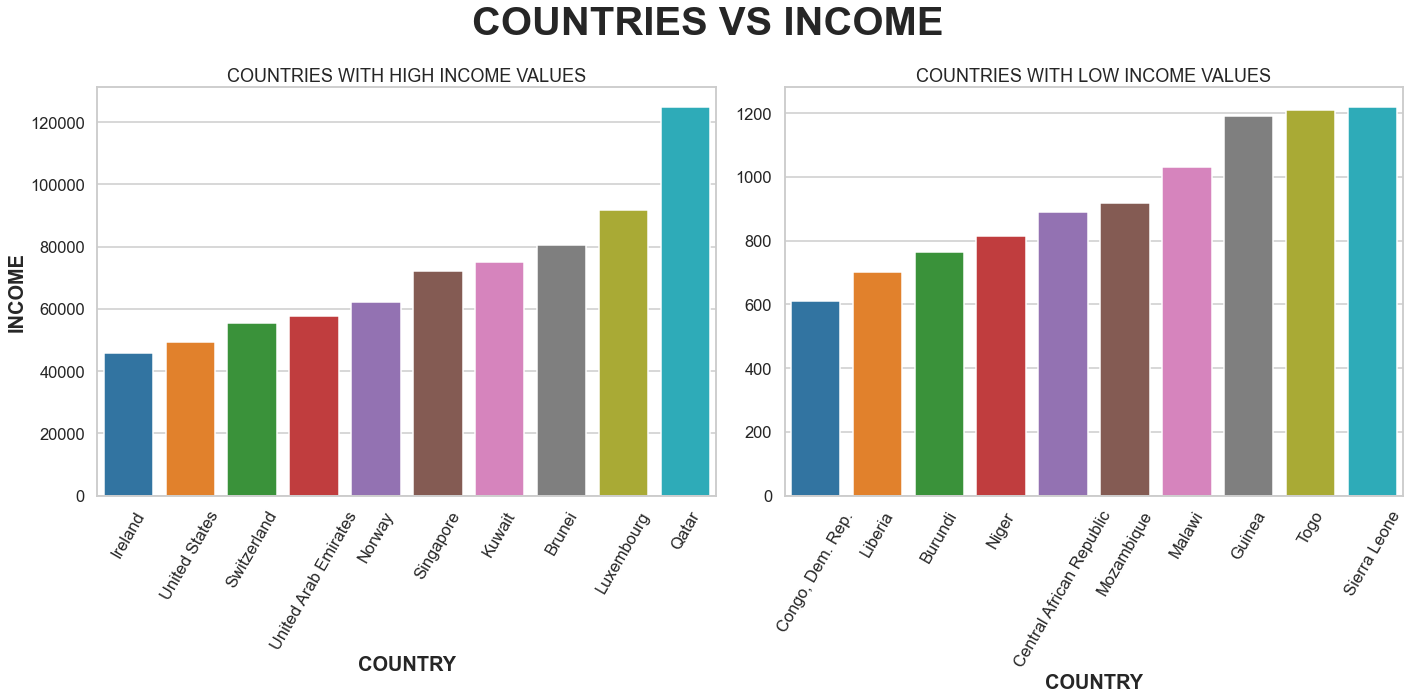

In [18]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='income',title='countries vs income',by='income')

__Inferences from the above plot:__

    1. Countries like Qatar, Luxembourg , Brunei are seen with higher income rates, whereas Congo, Liberia, Burundi  are with lower income rates
    2. 120000 is the highest score of income in the dataset, and 600 is the lowest

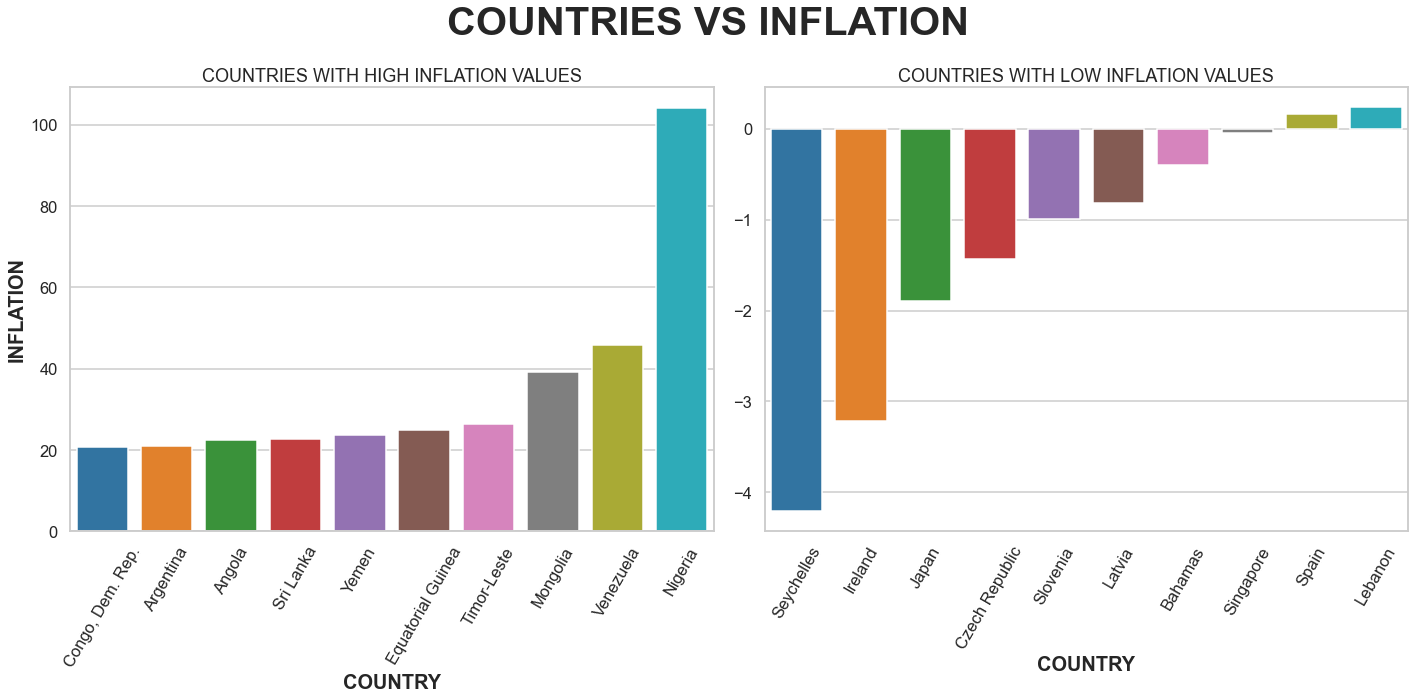

In [19]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='inflation',title='countries vs inflation',by='inflation')

__Inferences from the above plot:__

    1. Countries like Nigeria, Venezuela , Mongolia are seen with higher inflation rates, whereas Seychelles, Ireland, Japan  are with lower inflation rates
    2. 100 is the highest score of inflation in the dataset, and -4 is the lowest

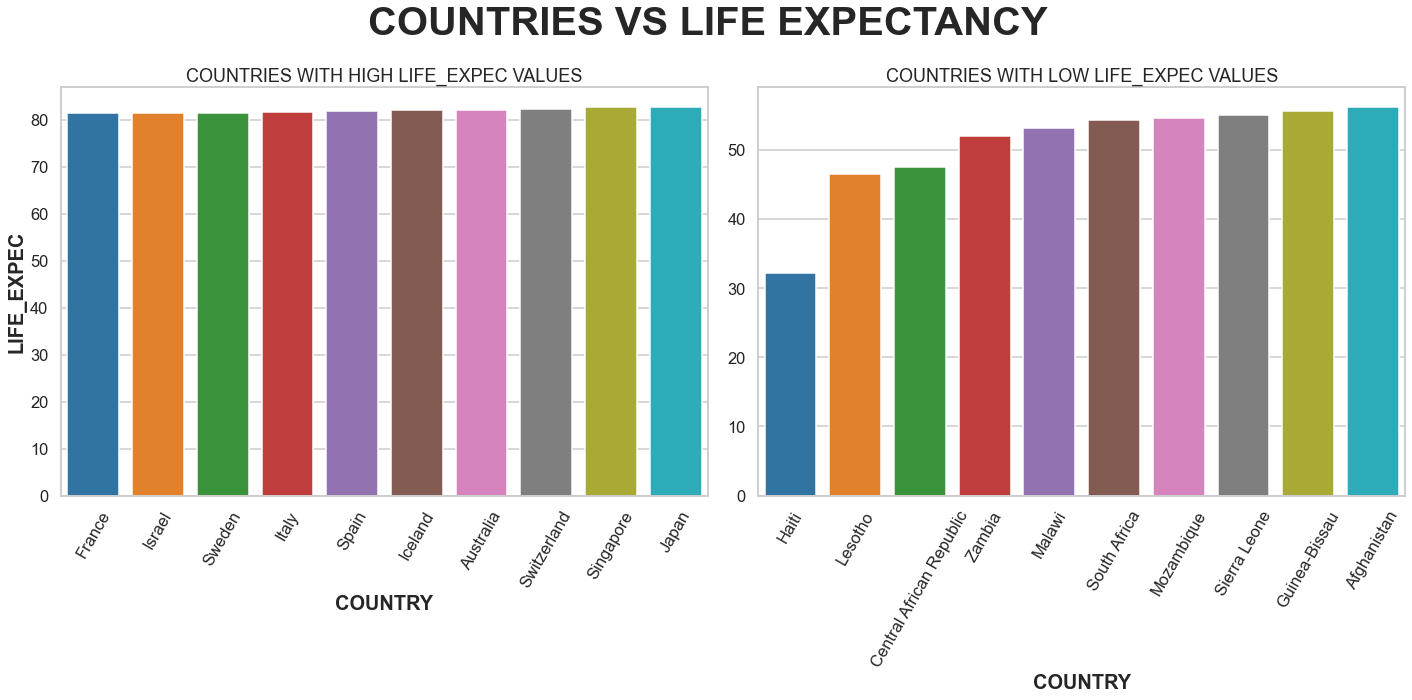

In [20]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='life_expec',title='countries vs life expectancy',by='life_expec')

__Inferences from the above plot:__

    1. Countries like Japan, Singapore , Switz are seen with higher life-expectancy rates, whereas Haiti, Lesotho, Central African Republic are with lower life-expectancy rates
    2. 84 is the highest score of life-expectancy in the dataset, and 32 is the lowest

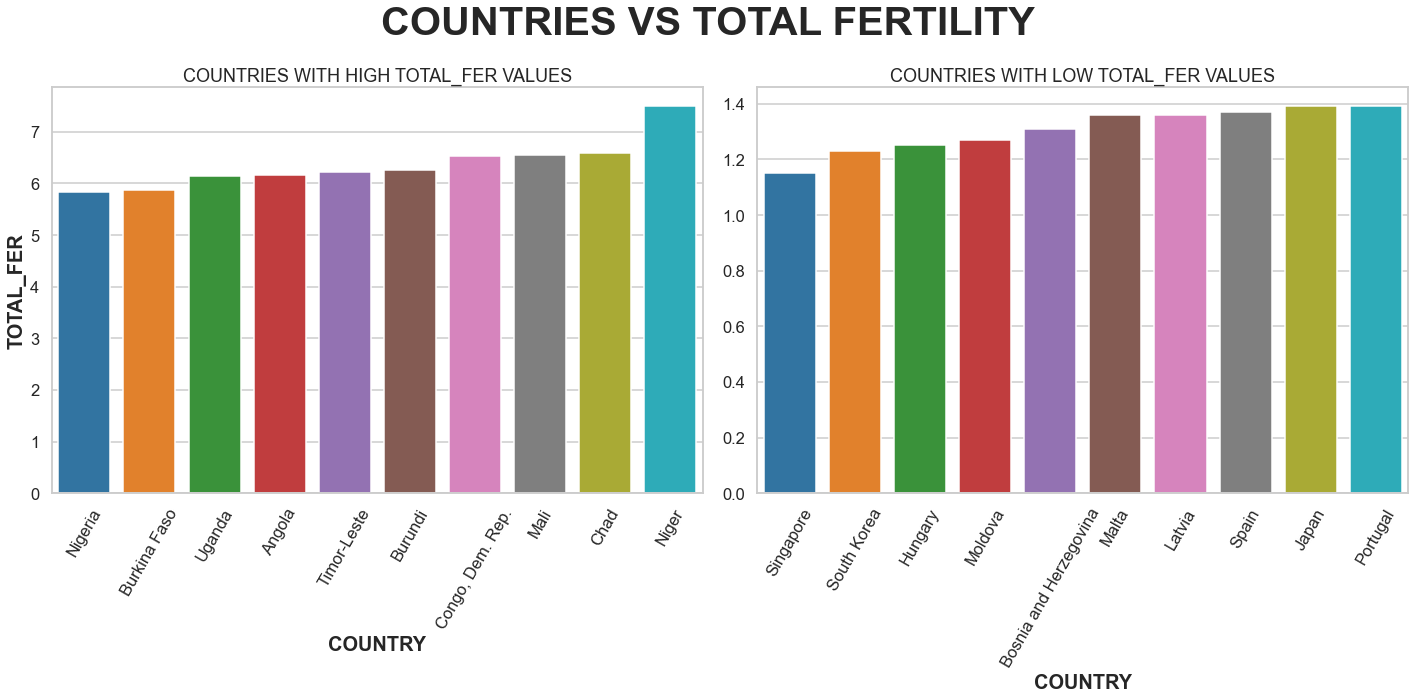

In [21]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='total_fer',title='countries vs total fertility',by='total_fer')

__Inferences from the above plot:__

    1. Countries like Niger, Chad , Mali are seen with higher fertility rates, whereas Singapore, South Korea, Hungary  are with lower fertility rates
    2. 7.5 is the highest score of fertility in the dataset, and 1.1 is the lowest

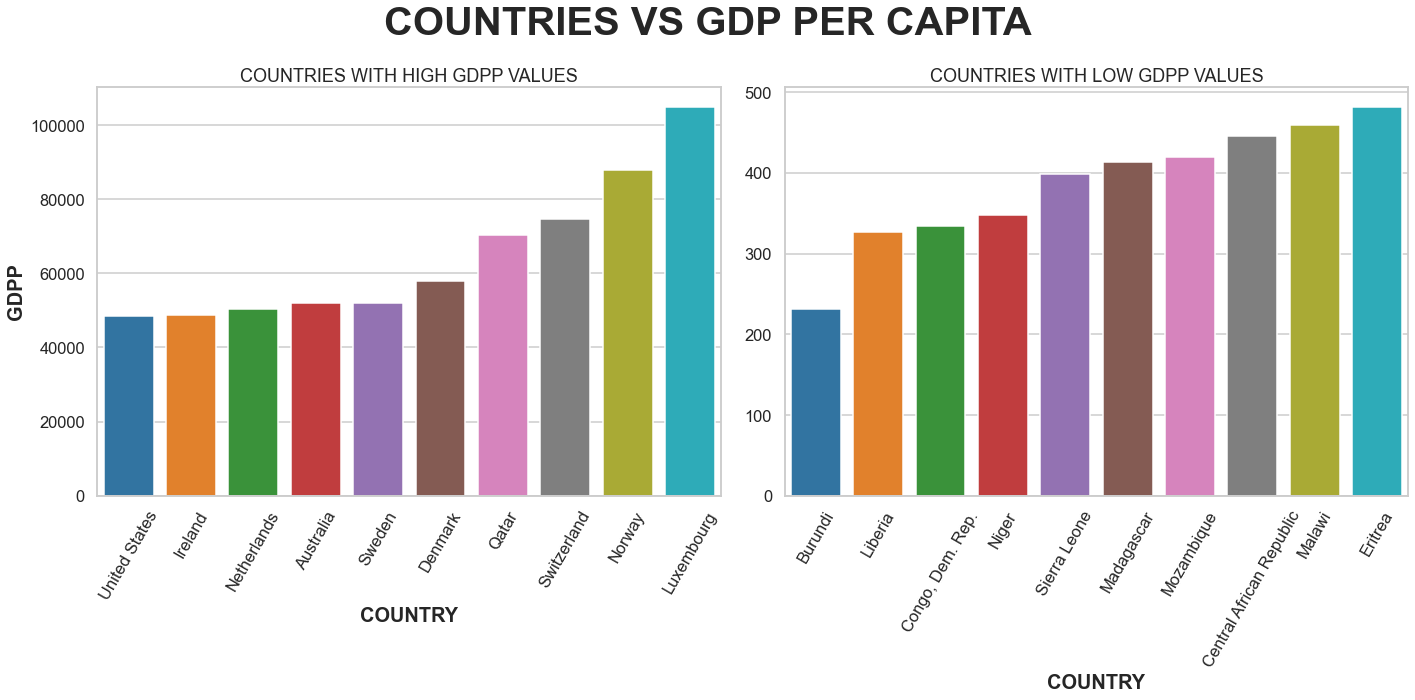

In [22]:
# Passing the values in the funtion to get the output of bar plot

bibarplot(ylabel='gdpp',title='countries vs gdp per capita',by='gdpp')

__Inferences from the above plot:__

    1. Countries like Luxembourg, Norway , Switz are seen with higher Gdp rates, whereas Burundi, Liberia, Congo  are with lower Gdp rates
    2. 120000 is the highest score of Gdp in the dataset, and 240 is the lowest

### Scatterplots

Here we define a function to plot the scatter plots as many as we need in a single line of code

In [23]:
# Defining the function to use it for multiple times

def biscatter(data1, column1, column2, xlabel,ylabel,hue=None):
    
    fig = plt.figure(figsize=(15,5))
    
    fig.suptitle(xlabel.upper()+' vs '+ylabel.upper(),fontweight="bold")
    
    # Plotting the scatter plot with appropriate parameter use
    plot = sns.scatterplot(data=data1, x=column1,y=column2,palette='cool',hue=hue)
    plot.set_xlabel(xlabel.upper())
    plot.set_ylabel(ylabel.upper())
    
    plt.tight_layout()
    plt.show()

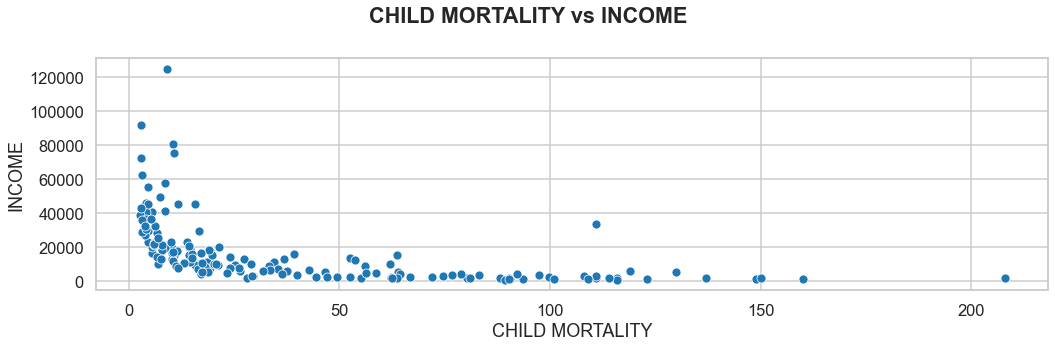

In [24]:
# Passing the values in the funtion to get the output of scatter plot

biscatter(data1=country,column1='child_mort',column2='income',xlabel='Child Mortality',ylabel='Income')

__Inferences from the above plot:__

    1. As the Child Mortality increases, the income become lower in the countries
    2. Income strikes higher when the Mortality range was between 5 and 10

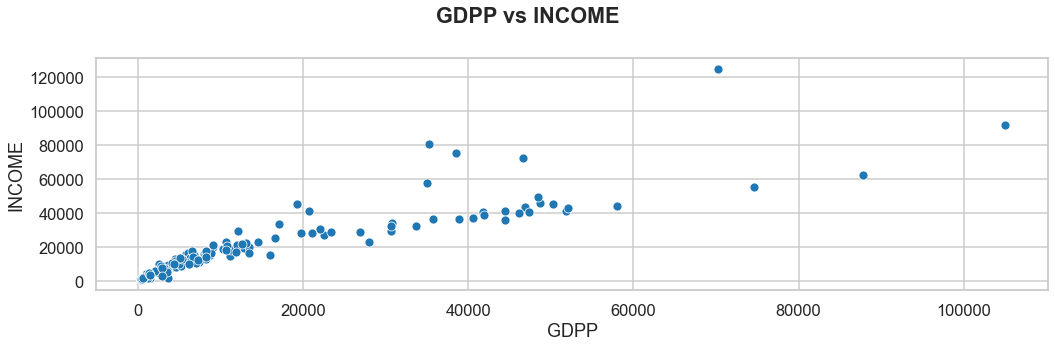

In [25]:
# Passing the values in the funtion to get the output of scatter plot

biscatter(data1=country,column1='gdpp',column2='income',xlabel='gdpp',ylabel='Income')

__Inferences from the above plot:__

    1. As the Gdpp increases, the income also increase in the countries(directly proportional)
    2. Income strikes higher when the Gdpp range was between 60k and 80k

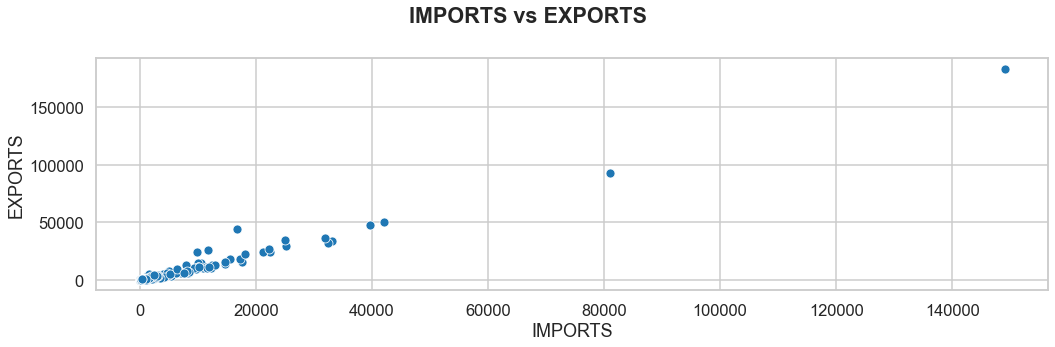

In [26]:
# Passing the values in the funtion to get the output of scatter plot

biscatter(data1=country,column1='imports',column2='exports',xlabel='imports',ylabel='exports')

__Inferences from the above plot:__

    1. As the Exports increases, the imports also increase in the countries(directly proportional)
    2. Exports strikes higher when the Imports range was between 150 and 175

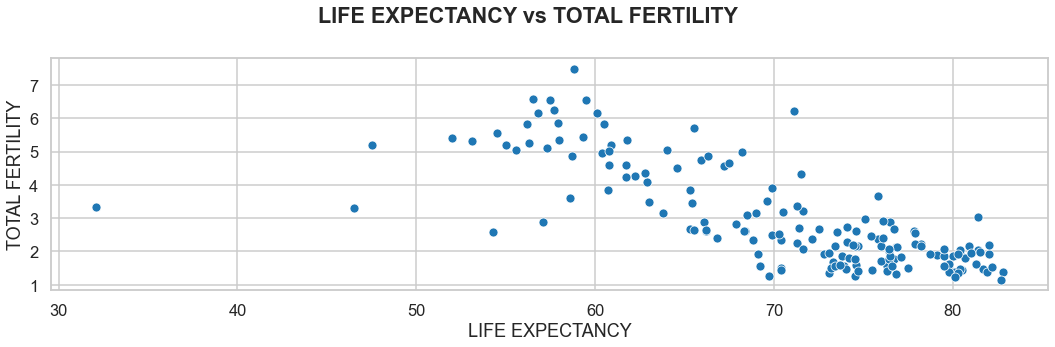

In [27]:
# Passing the values in the funtion to get the output of scatter plot

biscatter(data1=country,column1='life_expec',column2='total_fer',xlabel='Life Expectancy',ylabel='total fertility')

__Inferences from the above plot:__

    1. As the Fertility increases, the Life Expectancy decreases in the countries(inversely proportional)
    2. Fertility strikes higher when the Life Expectancy range was between 50 and 60

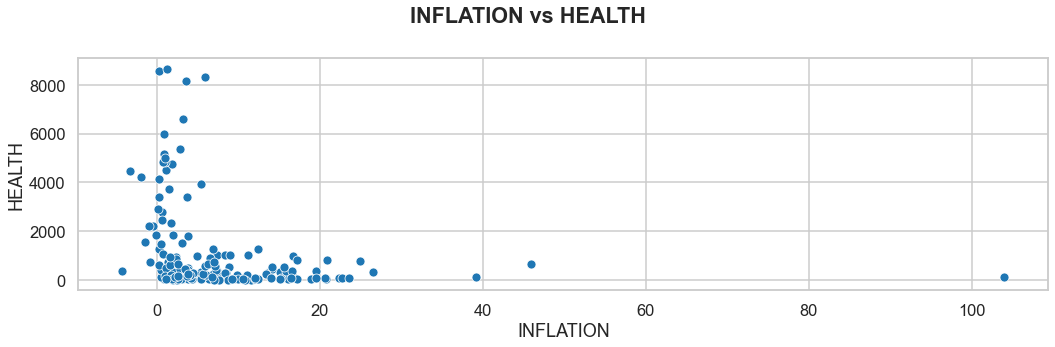

In [28]:
# Passing the values in the funtion to get the output of scatter plot

biscatter(data1=country,column1='inflation',column2='health',xlabel='inflation',ylabel='health')

__Inferences from the above plot:__

    1. As the Health increases, the Inflation gradually decreases in the countries
    2. Health strikes higher when the Inflation range was between 0 and 5

### Multivariate

We will take two kinds of plots to identify the trends and correlation between the variables

### Pairplot
Depends on the distributed diagonal values, we can say something about data


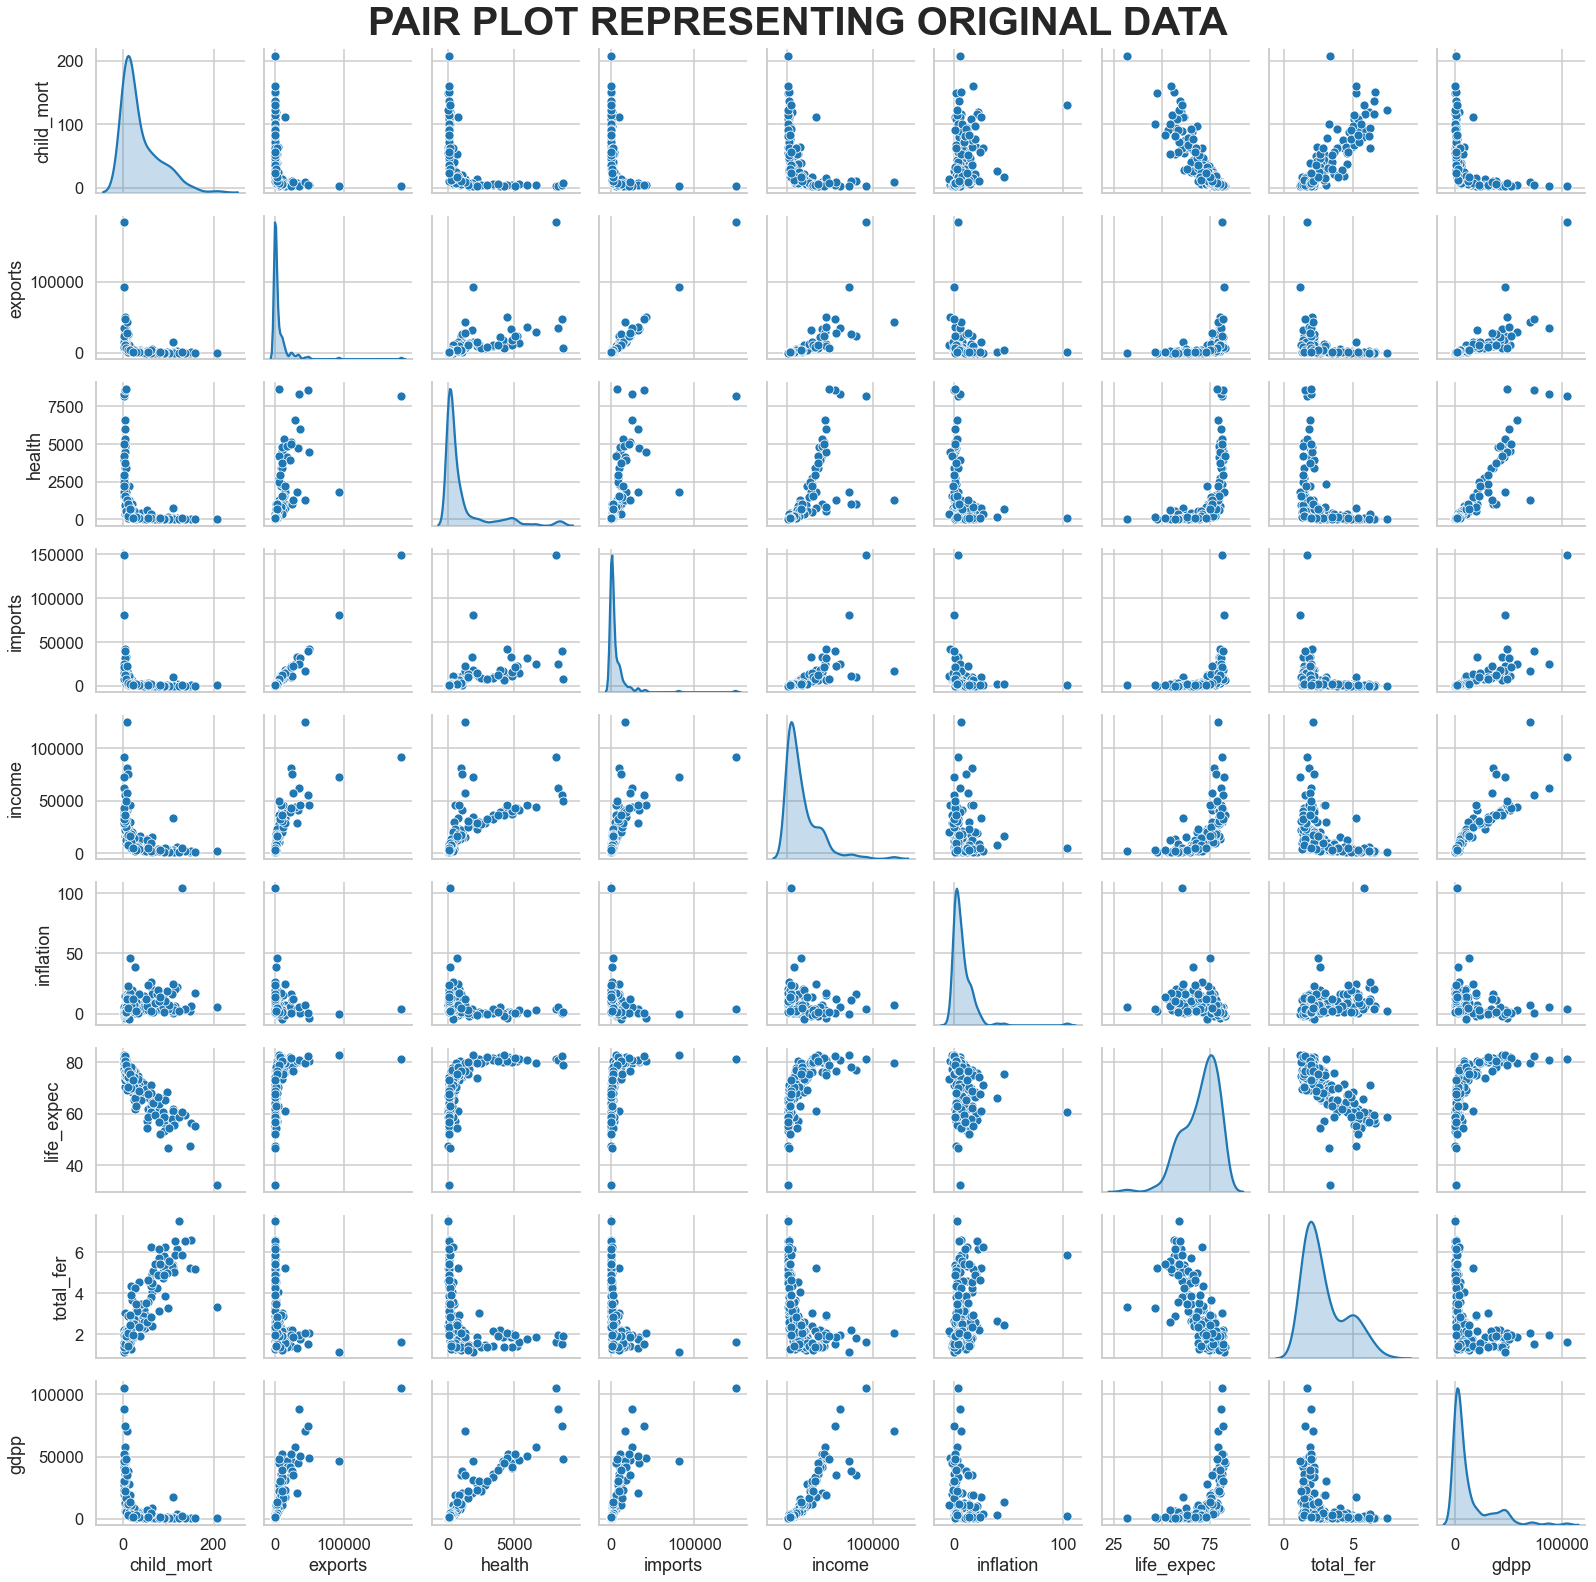

In [29]:
# Plotting the pairplot to see the trend

plot=sns.pairplot(country,diag_kind='kde')
plot.fig.suptitle("Pair plot representing original data".upper(),fontsize = 40,fontweight="bold")
plt.tight_layout()
plt.show()

__Inferences from the above plot:__

    1. Child Mortality has a significant positive correlation with the Total Fertility variable,and negative correlation with Life Expectancy
    2. Exports has a positive correlation with Imports, Income and Gdpp. Life Expectancy sees a sudden variance after a while
    3. Health has a positive correlation with Income, Gdpp and Imports
    4. Imports and Gdpp are seen with some good pattern of correlation with each other
    5. Income and Gdpp are the one which seems to have a stroger relationship while comparing with the rest of the variables
    6. Inflation variable does not show any specific pattern with any of the variables which has a cluttered pattern overall


### HeatMap

A representation of data in the form of a map or diagram in which data values are represented as colours

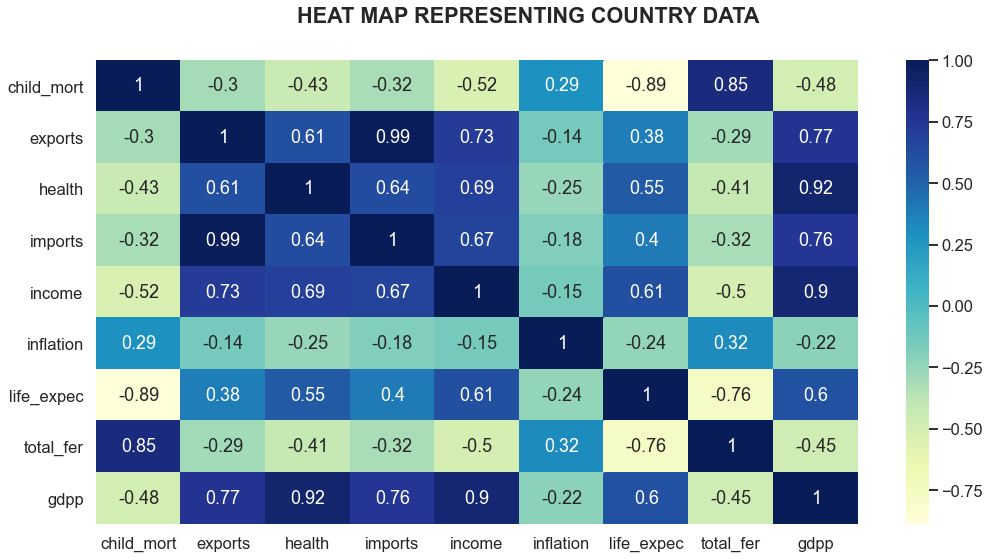

In [30]:
# Producing the Heatmap to see the correlation

plt.figure(figsize=(15,8))
plot = sns.heatmap(country.corr(),annot=True,cmap='YlGnBu')
plt.suptitle("Heat Map Representing Country data".upper(),fontweight="bold")
plt.tight_layout()
plt.show()

__Inferences from the above plot:__

    1. Exports anbd Imports are the one with very high positive correlation with the value about 0.99
    2. Followed by that, health and Gdp has a correaltion of about 0.92 which is also stronger
    3. 0.85 is the correlation coeffiecient of Child Mortality and Total Fertility
    4. Life Expectancy and Child Mortality has a high negative correlation of about -0.89
    5. Total Fertility and Life Expectancy also has a negative correlation
    6. Able to see a pattern with Exports, Imports, Health and Income variables in the map

## Capping the outliers

We are trying to cap the outliers initially and would able to see the data loss of capping the outliers. Followed by that, we could able to decide whether to remove the outliers or going not with handling the outliers

In [31]:
# Defining the Quartiles and trying to understand the data loss

# Capping based on a variable
Q1_gdpp = country.gdpp.quantile(0.05)
Q3_gdpp = country.gdpp.quantile(0.95)

country_capped_gdpp = country[((country.gdpp <= Q3_gdpp))]

# Capping based on a variable
Q1_child_mort = country.child_mort.quantile(0.05)
Q3_child_mort = country.child_mort.quantile(0.95)

country_capped_child_mort = country[((country.child_mort <= Q3_child_mort))]

# Capping based on a variable
Q1_income = country.income.quantile(0.05)
Q3_income = country.income.quantile(0.95)

country_capped_income = country[((country.income <= Q3_income))]

# Capping based on a variable
Q1_inflation = country.inflation.quantile(0.05)
Q3_inflation = country.inflation.quantile(0.95)

country_capped_inflation = country[((country.inflation <= Q3_inflation))]

# Capping based on a variable
Q1_health = country.health.quantile(0.05)
Q3_health = country.health.quantile(0.95)

country_capped_health = country[((country.health <= Q3_health))]


print("Total rows in the DF is {0}".format(str(country.shape[0])))

print('After Capping the outliers on the basis of Gdpp, there are {0} rows/countries to be removed'.format(str(country.shape[0]-country_capped_gdpp.shape[0])))
print('After Capping the outliers on the basis of Child Mortality, there are {0} rows/countries to be removed'.format(str(country.shape[0]-country_capped_child_mort.shape[0])))
print('After Capping the outliers on the basis of Income, there are {0} rows/countries to be removed'.format(str(country.shape[0]-country_capped_income.shape[0])))
print('After Capping the outliers on the basis of Inflation, there are {0} rows/countries to be removed'.format(str(country.shape[0]-country_capped_inflation.shape[0])))
print('After Capping the outliers on the basis of Health, there are {0} rows/countries to be removed'.format(str(country.shape[0]-country_capped_health.shape[0])))

Total rows in the DF is 167
After Capping the outliers on the basis of Gdpp, there are 9 rows/countries to be removed
After Capping the outliers on the basis of Child Mortality, there are 8 rows/countries to be removed
After Capping the outliers on the basis of Income, there are 9 rows/countries to be removed
After Capping the outliers on the basis of Inflation, there are 9 rows/countries to be removed
After Capping the outliers on the basis of Health, there are 9 rows/countries to be removed


As seen from the above output, there are 9/8 countries to be removed from the analysis which should not happen as we may get a varied results out of the values although we kept the upper limit as 95th Quartile.

Understood that the outliers are only the countries which may not be in a need of direst need of aid by the analysis with Gdpp, but it varies with other varibles in the crew. For instance, outliers in the Child Mortality and Inflation are the really noted countries to be considered here.Hence ___we decide not to remove the outliers___, so as to give the CEO the really perfect information

## Scaling the data

__Feature scaling__ or __data normalization__ is the method used to standardize the range of features of data. We understand that, the range of values of data may vary widely, it becomes a necessary step in data preprocessing before jumping into model building

Here we are going to use the ___MinMaxScaler___

MinMaxScaler preserves the shape of the original distribution. It does not meaningfully change the information in the original data. __MinMaxScaler doesn't reduce the importance of outliers__ , so it will be opt because of outliers we have

StandardScaler can be influenced by outliers ,if they exist in the dataset. We are not using StandardScaler here, since we do have the outliers.

In [32]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Initializing scaler
minmaxscaler = RobustScaler()

country_df = country.iloc[:,1:]

# Fitting and Transforming the numerical variables
country_scaled = minmaxscaler.fit_transform(country_df)

# Creating a DF to convert the array 
country_scaled = pd.DataFrame(country_scaled)

country_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.316620 -0.252112 -0.311629 -0.253876 -0.429416   0.453020   -1.469565   
1   -0.050139 -0.092556 -0.060097 -0.008170 -0.001543  -0.100671    0.278261   
2    0.148561 -0.009486 -0.151273 -0.091129  0.151196   1.197987    0.295652   
3    1.851439  0.061742 -0.246304 -0.075036 -0.208794   1.902685   -1.130435   
4   -0.167131  0.552428  0.460565  0.726083  0.470044  -0.441834    0.321739   

   total_fer      gdpp  
0   1.635492 -0.322877  
1  -0.364508 -0.044811  
2   0.230216 -0.015723  
3   1.798561 -0.088836  
4  -0.134293  0.592767

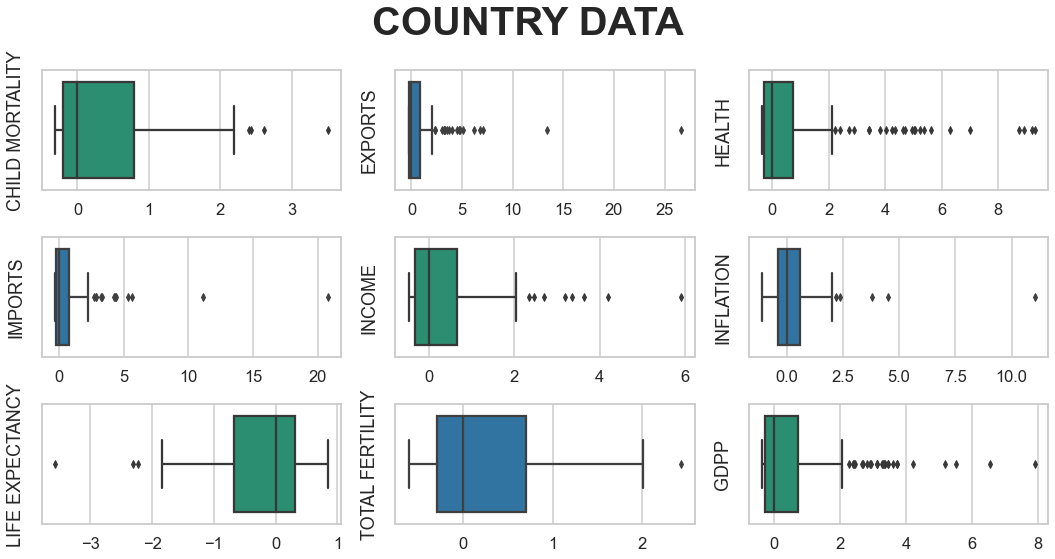

In [33]:
# passing the new DF to get the box plot output

uniboxplot(country_scaled)

__Inferences from the above plot:__

    1. Child Mortality has the mean of 0.1 and range upto 0.7, there are outliers in the upper fencing
    2. Mean of 0.05 and range upto 0.1, there are outliers in the upper fencing in exports values column
    3. Health has the mean of 0.08 and range upto 0.12, there are outliers in the upper fencing
    4. Mean of 0.03 and range upto 0.14, there are outliers in the upper fencing in imports values column
    5. Income has the mean of 0.08 and range upto 0.4, there are outliers in the upper fencing
    6. Mean of 0.1 and range upto 0.25, there are outliers in the upper fencing in inflation values column
    7. The main idea of showing this is there is no difference in the data as scaling does not change the data

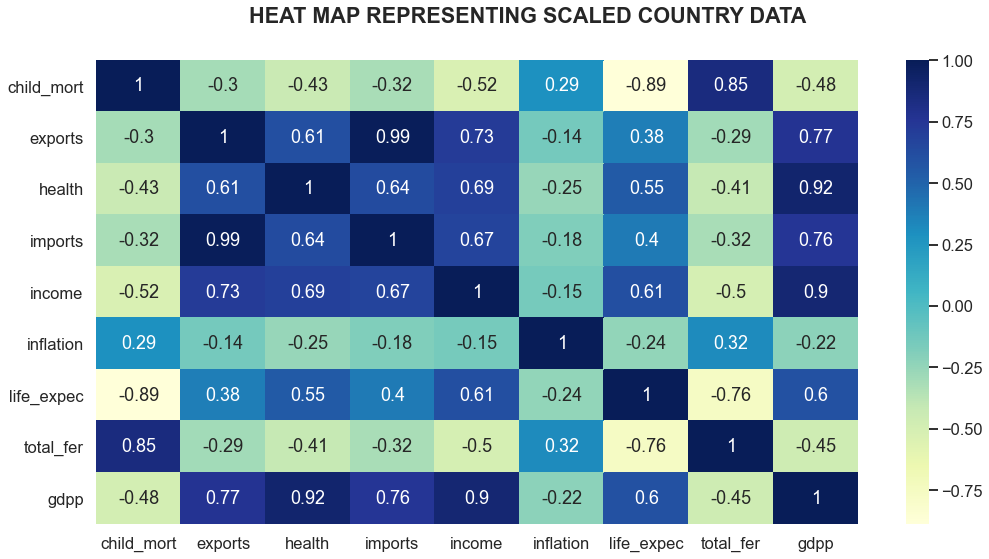

In [34]:
# Producing the Heatmap to see the correlation 

plt.figure(figsize=(15,8))
plot = sns.heatmap(country_scaled.corr(),annot=True,cmap='YlGnBu')
plt.suptitle("Heat Map Representing scaled Country data".upper(),weight="bold")
plt.tight_layout()
plt.show()

__Inferences from the above plot:__

    1. Exports anbd Imports are the one with very high positive correlation with the value about 0.99
    2. Followed by that, health and Gdp has a correaltion of about 0.92 which is also stronger
    3. 0.85 is the correlation coeffiecient of Child Mortality and Total Fertility
    4. Life Expectancy and Child Mortality has a high negative correlation of about -0.89
    5. Total Fertility and Life Expectancy also has a negative correlation
    6. Able to see a pattern with Exports, Imports, Health and Income variables in the map
    
    This is also an evident that there is no change in the data,so is the correlation

## Clustering Tendency - Hopkins Test

Hopkins Test is used to test the cluster tendency if clustering is relevant in our dataset. It check if observations are randomly distributed in the space or not.

Hopkins Statistics can be defined as follows:


$$ H =   \displaystyle \Bigg[\frac{\sum \limits _{i=1} ^{n} y_{i}} {\sum \limits _{i=1} ^{n} x_{i} + \sum \limits _{i=1} ^{n} y_{i}}\Bigg]$$

yi - nearest neighbour distances from uniformly generated sample points to sample data from given dataset

xi - nearest neighbour distances within sample data from given dataset

It is defined as the sum of nearest neighbor distances from same cluster per sum of both nearest neighbor distances of same and different cluster respectively 

If H < 0.5, then it is unlikely that dataset has statistically significant clusters.

If the value of Hopkins statistic is close to 1, then we can conclude that the dataset is significantly a clusterable data.

In [35]:
# Importing libraries for performing Hopkins Statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
    
# Defining the Hopkins Test Statistics
def hopkins(X):
    dimension = X.shape[1] # Dimension
    number = len(X) # Rows
    m_value = int(0.1 * number) 
    numbers = NearestNeighbors(n_neighbors=1).fit(X.values) # Fitting using Nearest Neighbors Algo
    random_X = sample(range(0, number, 1), m_value) # Generating the  range
    ujd_list = [] # y element list
    wjd_list = [] # x element list
    
    # Looping the elements/data points
    for j in range(0, m_value):
        # Getting the y distance
        u_distance, _ = numbers.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),dimension).reshape(1, -1), 2, return_distance=True)
        ujd_list.append(u_distance[0][1])
        
        # Getting the x distance
        w_distance, _ = numbers.kneighbors(X.iloc[random_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd_list.append(w_distance[0][1])
     
    # Applying the Hopkins formula
    H = sum(ujd_list) / (sum(ujd_list) + sum(wjd_list))
    
    # If H value is not a number, then it would print the result with H = 0
    if isnan(H):
        print(ujd_list, wjd_list)
        H = 0
 
    return H

Hopkins Function will determine the Cluster Tendency score by passing the DataFrame

In [36]:
# Passing the DF in Hopkins function in order to determine the possibility

print('Hopkins Test Statistics value of Raw Original data',hopkins(country.iloc[:,1:]))
print('Hopkins Test Statistics value of Scaled data',hopkins(country_scaled))

Hopkins Test Statistics value of Raw Original data 0.9812638133275803
Hopkins Test Statistics value of Scaled data 0.9154780376817322


Since the Hopkins Test values are greater than 0.5 and close to 1, we are concluding dataframe is capable of forming the good clusters  

Test Statistics in the Raw data is more, but it is an unscaled data. so ___we are proceeding with the scaled data___ in order to get the perfect clusters


# MODEL EVALUATION

## Determining The Optimal Number Of Clusters

The direct methods and statistical testing methods:

1. Direct methods: 
      The corresponding methods that we have here named Elbow and Silhouette methods, respectively.
      
      
2. Statistical testing methods: 
      Consists of comparing evidence against null hypothesis. An example is the gap statistic testing method.
        
Here we are going with Direct Methods, as it is easy to interpret and analysis the values

## Elbow Curve Method

The elbow method runs k-means clustering on the dataset for a range of values for k and then for each value of k computes an average score for all clusters.

In [37]:
# Importing the KMeans library
from sklearn.cluster import KMeans

X =country_scaled

# Cluster range from 0 to 10
cluster_range = range( 1, 11)
cluster_errors_list = []

# Looping the cluster for every cluster range in K Means
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)                                    # Fitting the DF
    cluster_errors_list.append( clusters.inertia_ )    # Appending the inertia

# Gathered the cluster_range and cluster_errors into a DF 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors_list} )
clusters_df

num_clusters  cluster_errors
0             1     3553.307683
1             2     2035.071707
2             3     1137.903245
3             4      909.846294
4             5      739.956932
5             6      607.641257
6             7      501.219059
7             8      422.537633
8             9      355.484224
9            10      313.710635

Cluster with the respective errors are gathered above

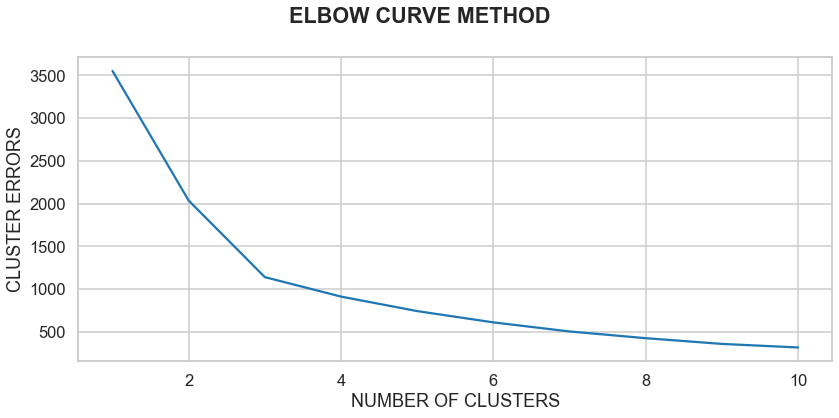

In [38]:
# Plotting the above cluster into a line graph

plt.figure(figsize=(12,6))
plot=sns.lineplot(clusters_df.num_clusters,clusters_df.cluster_errors,markers=True)
plt.suptitle("elbow curve method".upper(),weight="bold")
plot.set_xlabel('Number of Clusters'.upper())
plot.set_ylabel('Cluster Errors'.upper())
plt.tight_layout()
plt.show()

From the above Elbow method, ___K = 3___ seems to be good option since the curve gets the considerable amount of change after that point

___Technical Aspect___:
    While looking into the Squared Sum of Distances plot, the Cluster Errors are getting reduced once after the n = 2. But as it increases, after n = 3 it does not seem to have a really noteable significant in the change of the cluster errors which is what we need.

___Business Problem Aspect___:
    Business is we need to understand and suggest the CEO about the under-developed countries. As a general knowledge, we do know about three types of countries around the Globe.
1. Developed Countries
2. Developing Countries
3. Under Developed Countries

so here we could identify the data can be clustered into three depends on the business specific problem

However we will also try the other method to understand the number of clusters suitable for the dataset


## Silhouette Method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually

Silhouette Coefficient can be defined as follows:

$$ S = \displaystyle \frac{b-a}{max(a,b)}$$

a = mean intra - cluster distance 

b = mean nearest - cluster distance for each sample 

It is defined as the difference between the two cluster distance per maximum of the two cluster distance considered

For clusters = 2 The average silhouette score is : 0.6410116161391679


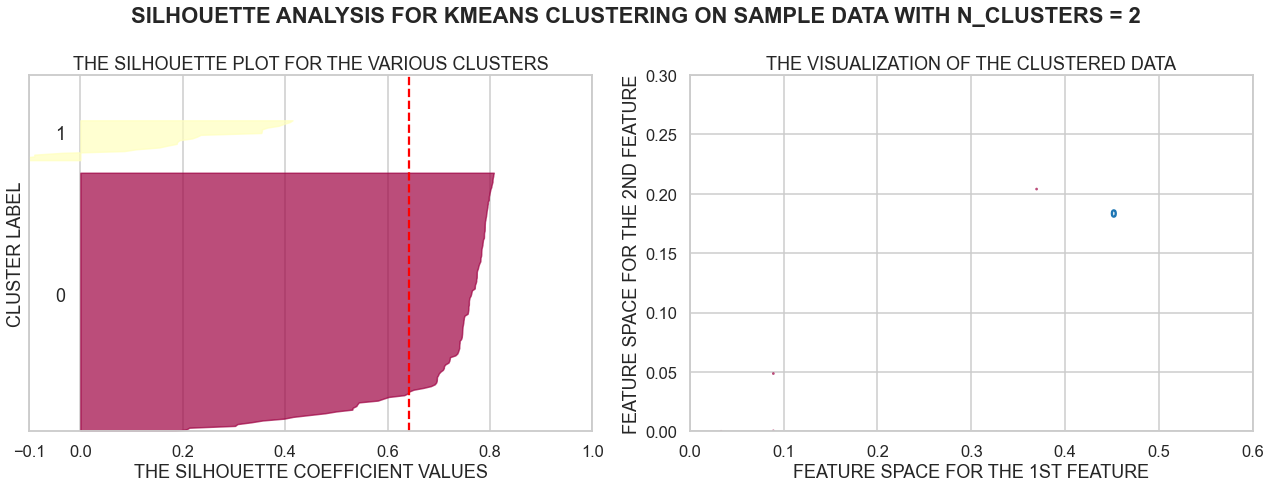

For clusters = 3 The average silhouette score is : 0.5868074505776568


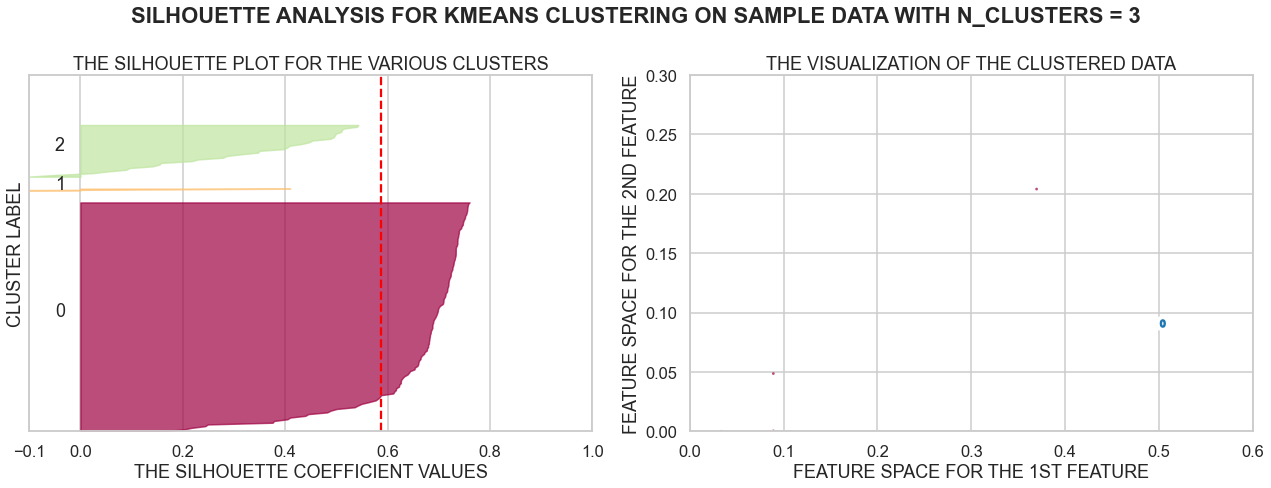

For clusters = 4 The average silhouette score is : 0.525699356011789


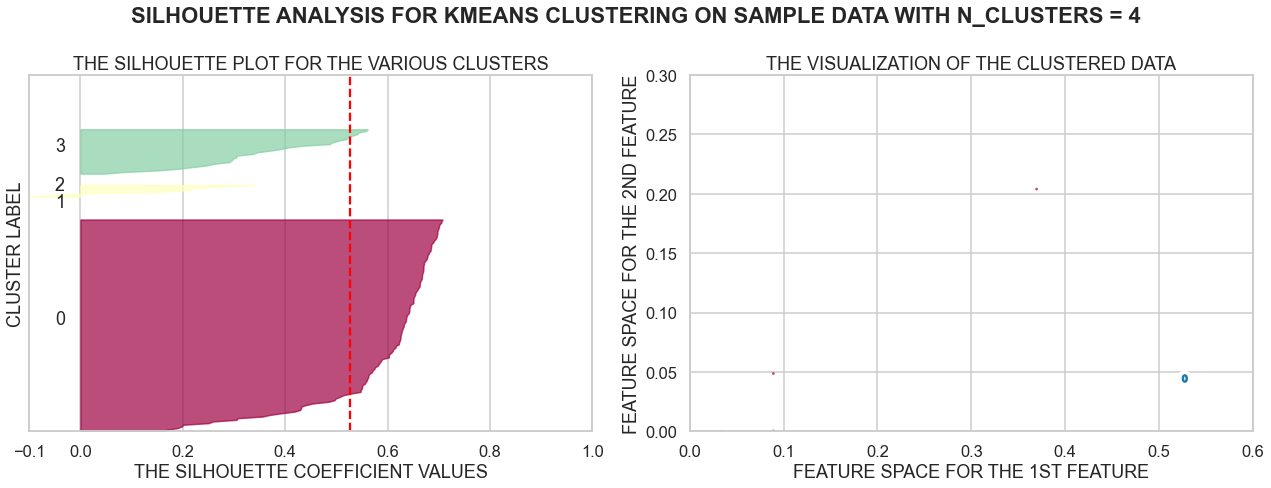

For clusters = 5 The average silhouette score is : 0.3545486285194494


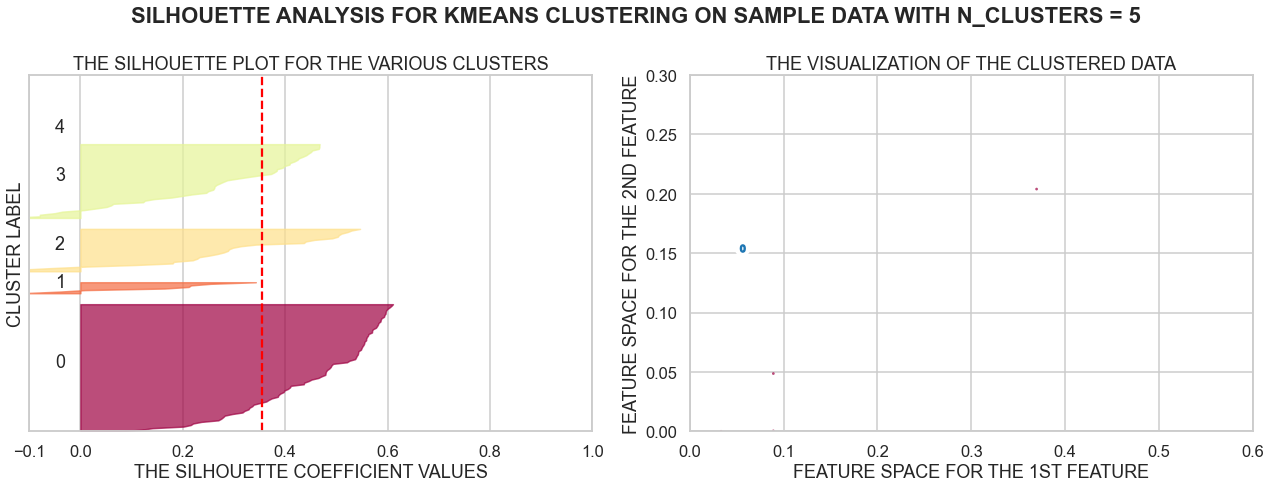

For clusters = 6 The average silhouette score is : 0.353597178675162


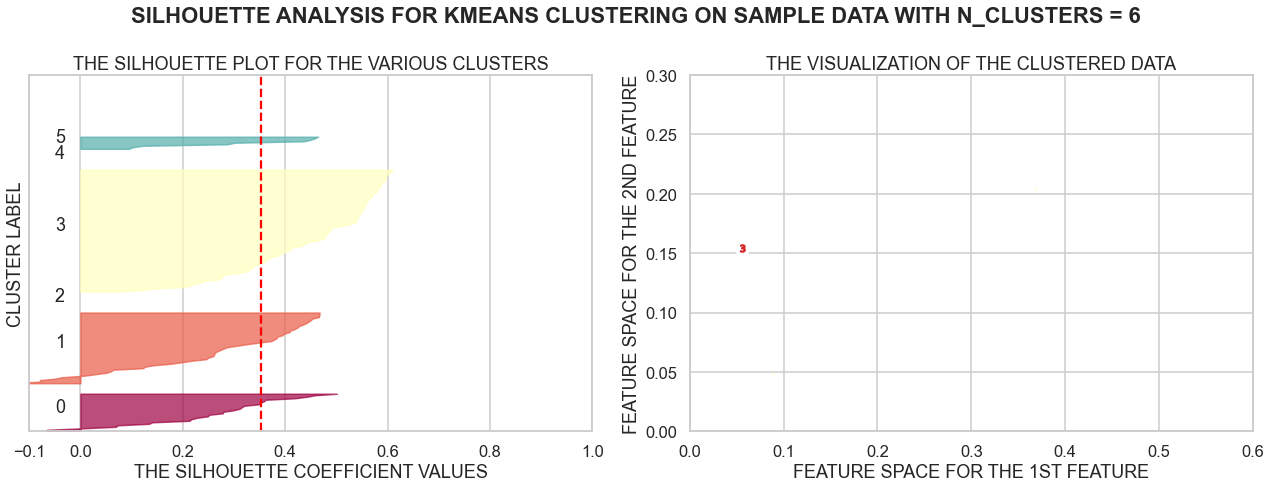

For clusters = 7 The average silhouette score is : 0.36002952103021213


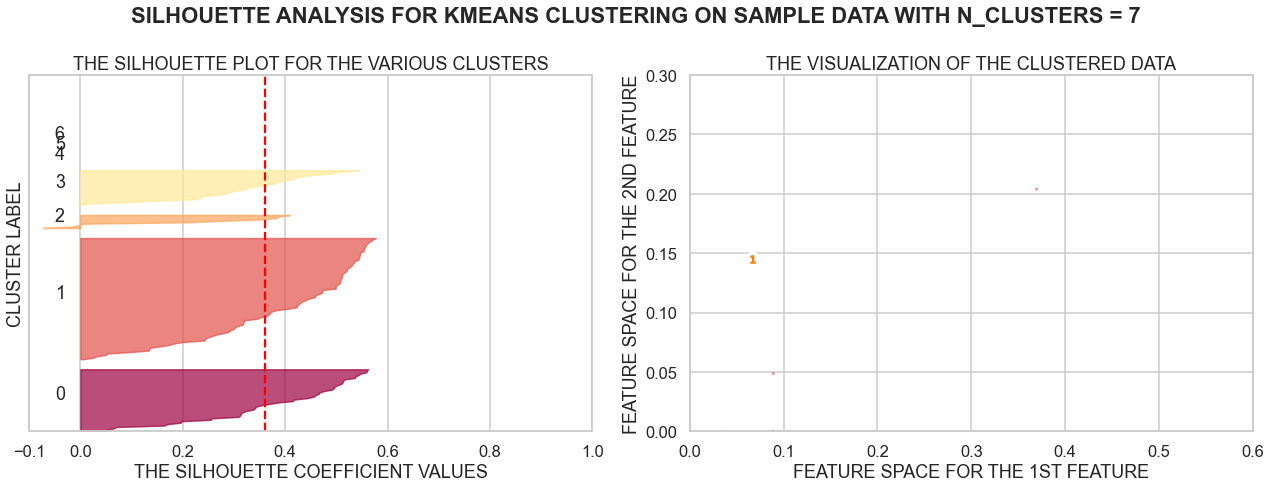

In [39]:
# Importing Libraries for Silhouette Method

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

X = country_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7] # We have a range of 2 to 7
silhouette = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1]) # Setting the axis limit to see the cluster
    ax1.set_ylim([0, len(X) + (n_clusters + 1)*10 ]) # Setting the axis limit to see the cluster

    # Initialize the clusterer with n_clusters value 
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score findings will be saved
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For clusters =", n_clusters,"The average silhouette score is :", silhouette_avg)
    silhouette.append([n_clusters,silhouette_avg])
    # Computing the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, 
                          edgecolor=color, alpha=0.7)

        # Labeling the plots with their cluster numbers 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computing the new y_lower for next plot
        y_lower = y_upper + 6  

    ax1.set_title("The Silhouette plot for the various clusters".upper())
    ax1.set_xlabel("The silhouette coefficient values".upper())
    ax1.set_ylabel("Cluster label".upper())

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)
    ax2.set_xlim([0, 0.6]) # Setting the axis limit to see the cluster
    ax2.set_ylim([0, 0.3 ])
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The Visualization of the clustered data".upper())
    ax2.set_xlabel("Feature space for the 1st feature".upper())
    ax2.set_ylabel("Feature space for the 2nd feature".upper())

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters).upper(),
                 fontsize=22, fontweight='bold')

    plt.tight_layout()
    plt.show()


From the above Silhouette method, ___K = 3___ seems to be good option since the Silhouette Score is larger and the diagram also pretty fine on that

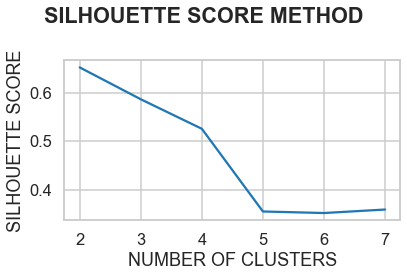

In [40]:
# Plotting the Silhouette in a line plot to visualize 
silhouette = []

for i in range(2,8):
    kmeans = KMeans(n_clusters = i).fit(country_scaled)
    silhouette.append([i, silhouette_score(country_scaled, kmeans.labels_)])
# Plotting the Silhouette Score against Number of Clusters
plot=sns.lineplot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1])
plt.suptitle("Silhouette Score method".upper(),weight="bold")
plot.set_xlabel('Number of Clusters'.upper())
plot.set_ylabel('Silhouette Score'.upper()) 

plt.tight_layout()
plt.show()

___Technical Aspect___:
    While looking into the Silhouette plot, the distance between the clusters gets increased when n= 2. As it increases, the maximum best score got obtained when n = 3. After which the Silhouette Coefficient value gets decreased, so the best score we are applying.

___Business Problem Aspect___:
    Business is we need to understand and suggest the CEO about the under-developed countries. As a general knowledge, we do know about three types of countries around the Globe.
1. Developed Countries
2. Developing Countries
3. Under Developed Countries

so here we could identify the data can be clustered into three depends on the business specific problem. And when the clusters are interchangeably clustered as cluttered , we cannot decide the outcome of the Model and it will ruin the entire process of clustering.

Hence by seeing the plot of the Silhouette Score , it is clear that ___Number of Clusters = 3___ would be suitable option to go for

# Model Building

## K - Means Clustering Algorithm 

K Means is an iterative algorithm meaning that we repeat multiple steps making progress each time. 
The approach K-Means follows to solve the problem is called _Expectation-Maximization._ The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster.

There are five steps to remember when applying k-means:
1. Assign a value for k which is the number of clusters
2. Randomly assign k centroids
3. Assign each data point to its closest centroid
4. Calculate the new cluster means and update the centroids
5. Repeat steps 3 and 4 until convergence

### Model 1 

Building the model with ___K = 3___ with the ___iteration of 10___ and ___random seed of 100___ to see the efficiency 

In [41]:
# Building the model using K = 3

model_clus3_iter1 = KMeans(n_clusters = 2, max_iter=10,random_state = 100)
model_clus3_iter1.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

Merging the predicted model with the scaled DF to see the Cluster Id

In [42]:
# Concatenating the predicted cluster label with the original DF

k_means = country_scaled
k_means.index = pd.RangeIndex(len(k_means.index))
countries_detail_kmeans_1 = pd.concat([k_means, pd.Series(model_clus3_iter1.labels_).astype(int)], axis=1)

# Giving the columns name
countries_detail_kmeans_1.columns = ['child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1','Cluster_Id']
countries_detail_kmeans_1.head()

child_mort_1  exports_1  health_1  imports_1  income_1  inflation_1  \
0      1.316620  -0.252112 -0.311629  -0.253876 -0.429416     0.453020   
1     -0.050139  -0.092556 -0.060097  -0.008170 -0.001543    -0.100671   
2      0.148561  -0.009486 -0.151273  -0.091129  0.151196     1.197987   
3      1.851439   0.061742 -0.246304  -0.075036 -0.208794     1.902685   
4     -0.167131   0.552428  0.460565   0.726083  0.470044    -0.441834   

   life_expec_1  total_fer_1    gdpp_1  Cluster_Id  
0     -1.469565     1.635492 -0.322877           0  
1      0.278261    -0.364508 -0.044811           0  
2      0.295652     0.230216 -0.015723           0  
3     -1.130435     1.798561 -0.088836           0  
4      0.321739    -0.134293  0.592767           0

Merging and Replacing the scaled data with the original data in order to see the Clusters

In [43]:
# Removing the scaled Data and shows the original data with Cluster labels

country_merge_kmeans_1=pd.merge(country.reset_index(),countries_detail_kmeans_1,left_index=True,right_index=True )

# Dropping the columns
country_merge_kmeans_1=country_merge_kmeans_1.drop(['index','child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1'],axis=1)
country_merge_kmeans_1.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

In [44]:
# Evaluating the number of elements in the clusters

country_merge_kmeans_1.Cluster_Id.value_counts()

0    147
1     20
Name: Cluster_Id, dtype: int64

Lets see the Scatterplots explain the relationship between the variables considered

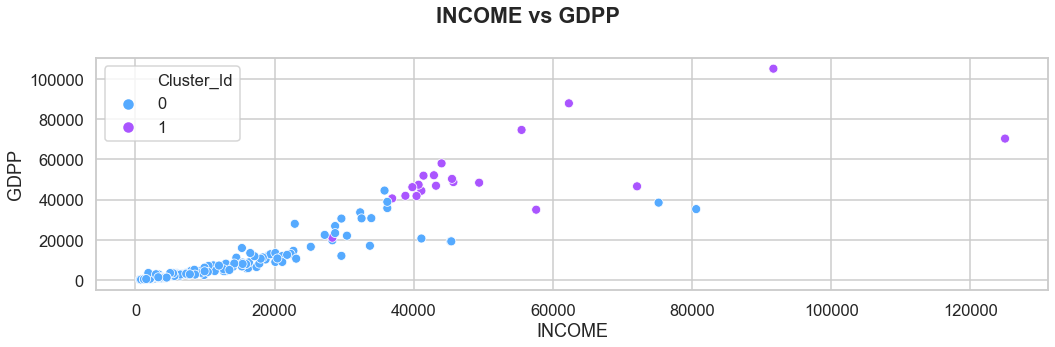

In [45]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_1,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 0 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 0 would be the suitable option

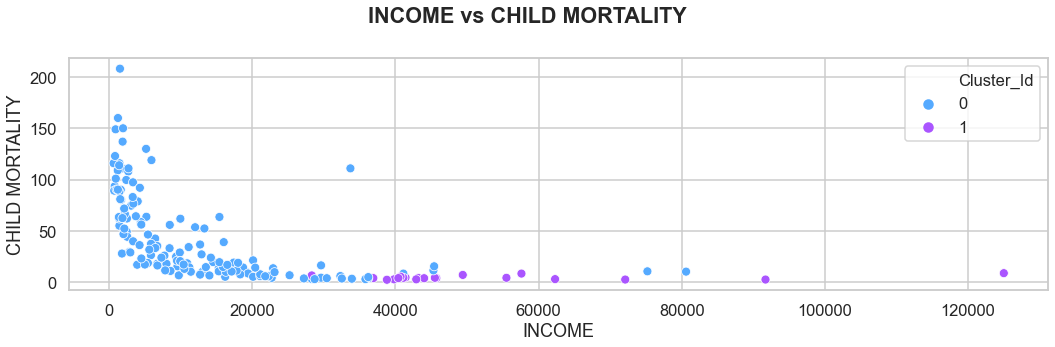

In [46]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_1,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 0 would be the suitable option

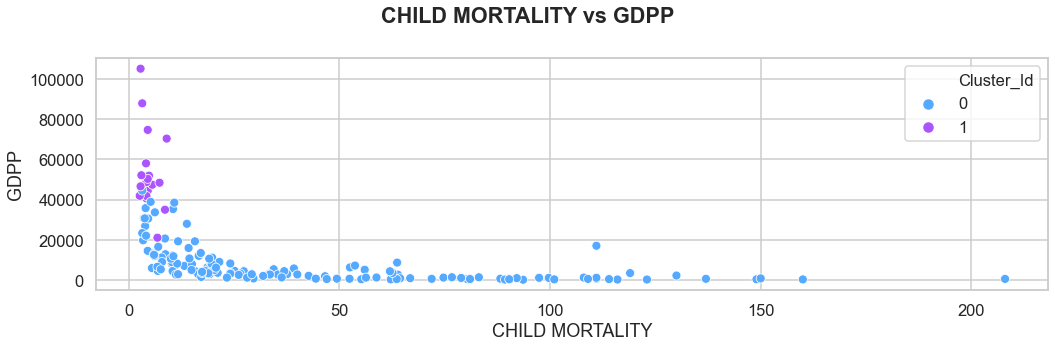

In [47]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_1,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 0 would be the suitable option

In [48]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_kmeans_1= pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).exports.mean())

health_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).health.mean())

imports_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).imports.mean())

income_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).income.mean())

inflation_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_kmeans_1 = pd.DataFrame(country_merge_kmeans_1.groupby(["Cluster_Id"]).gdpp.mean())


# Concatenating all the DF into one
country_analysis_df_kmeans_1= pd.concat([pd.Series([0,1,2]),child_mort_mean_kmeans_1,exports_mean_kmeans_1,health_mean_kmeans_1,
                                   imports_mean_kmeans_1,income_mean_kmeans_1,inflation_mean_kmeans_1,life_expec_mean_kmeans_1,
                                 total_fer_mean_kmeans_1,gdpp_mean_kmeans_1], axis=1)

# Giving the columns new name
country_analysis_df_kmeans_1.columns = ["Cluster_Id","child_mort_mean_km","exports_mean_km","health_mean_km","imports_mean_km","income_mean_km","inflation_mean_km","life_expec_mean_km","total_fer_mean_km","gdpp_mean_km"]
country_analysis_df_kmeans_1

Cluster_Id  child_mort_mean_km  exports_mean_km  health_mean_km  \
0           0           42.837415      3264.026854      523.026769   
1           1            4.700000     37971.570000     4979.475500   
2           2                 NaN              NaN             NaN   

   imports_mean_km  income_mean_km  inflation_mean_km  life_expec_mean_km  \
0      3143.404096    12386.823129           8.496218           69.191837   
1     31908.720000    52115.000000           2.531100           80.580000   
2              NaN             NaN                NaN                 NaN   

   total_fer_mean_km  gdpp_mean_km  
0           3.107415   7523.904762  
1           1.776000  52950.000000  
2                NaN           NaN

From the above consideration of DF, we require data from Low Income, Low Gdpp and High Child_Mortality. so ___Cluster Id 0___ is the data we want

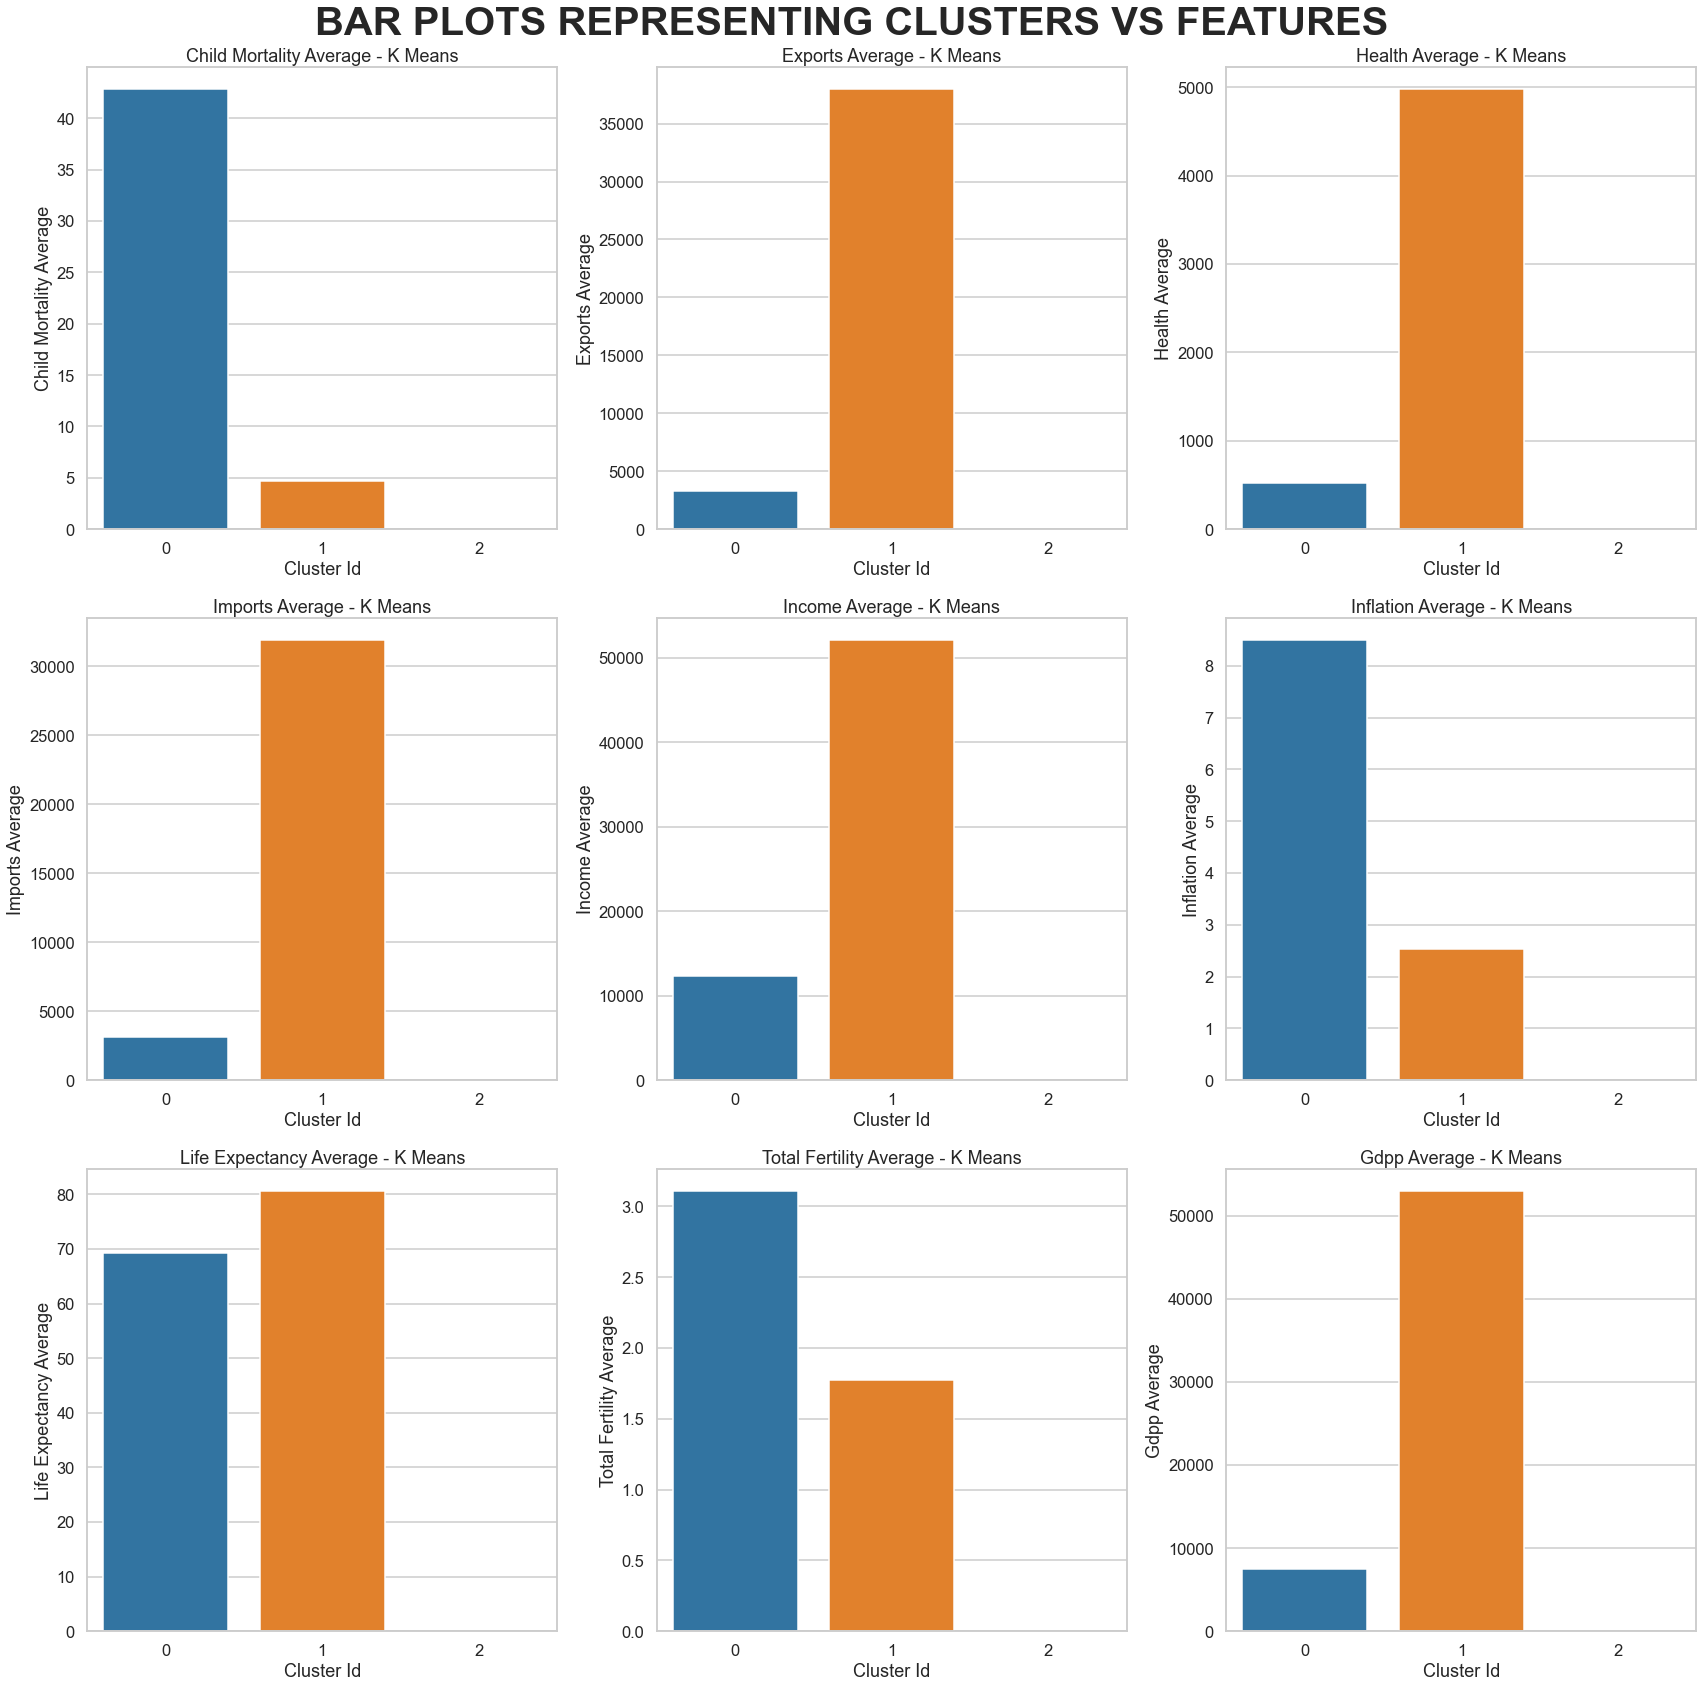

In [49]:
fig = plt.figure(figsize = (24,24))
fig = plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40, weight="bold")


# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.child_mort_mean_km)
plot1.set_title('Child Mortality Average - K Means')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.exports_mean_km)
plot2.set_title('Exports Average - K Means')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.health_mean_km)
plot3.set_title('Health Average - K Means')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.imports_mean_km)
plot4.set_title('Imports Average - K Means')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.income_mean_km)
plot5.set_title('Income Average - K Means')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.inflation_mean_km)
plot6.set_title('Inflation Average - K Means')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.life_expec_mean_km)
plot7.set_title('Life Expectancy Average - K Means')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.total_fer_mean_km)
plot8.set_title('Total Fertility Average - K Means')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_kmeans_1.Cluster_Id, country_analysis_df_kmeans_1.gdpp_mean_km)
plot9.set_title('Gdpp Average - K Means')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 2 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Cluster 1 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 0 is the one we want

### Model 2 with Distinct Iteration and Random seed

Building the model with ___K = 3___ with the ___iteration of 50___ and ___random seed of 0___ to see the efficiency 

In [50]:
# Building the model using K =3

model_clus3_iter2 = KMeans(n_clusters = 3, max_iter=50,random_state = 0)
model_clus3_iter2.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Merging the predicted model with the scaled DF to see the Cluster Id

In [51]:
# Concatenating the predicted cluster label with the original DF

k_means = country_scaled
k_means.index = pd.RangeIndex(len(k_means.index))
countries_detail_kmeans_2 = pd.concat([k_means, pd.Series(model_clus3_iter2.labels_).astype(int)], axis=1)

# Giving the columns name
countries_detail_kmeans_2.columns = ['child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1','Cluster_Id']
countries_detail_kmeans_2.head()

child_mort_1  exports_1  health_1  imports_1  income_1  inflation_1  \
0      1.316620  -0.252112 -0.311629  -0.253876 -0.429416     0.453020   
1     -0.050139  -0.092556 -0.060097  -0.008170 -0.001543    -0.100671   
2      0.148561  -0.009486 -0.151273  -0.091129  0.151196     1.197987   
3      1.851439   0.061742 -0.246304  -0.075036 -0.208794     1.902685   
4     -0.167131   0.552428  0.460565   0.726083  0.470044    -0.441834   

   life_expec_1  total_fer_1    gdpp_1  Cluster_Id  
0     -1.469565     1.635492 -0.322877           0  
1      0.278261    -0.364508 -0.044811           0  
2      0.295652     0.230216 -0.015723           0  
3     -1.130435     1.798561 -0.088836           0  
4      0.321739    -0.134293  0.592767           0

Cluster labels from the model 3 has been attached with the scaled DF

In [52]:
# Removing the scaled Data and shows the original data with Cluster labels

country_merge_kmeans_2=pd.merge(country.reset_index(),countries_detail_kmeans_2,left_index=True,right_index=True )

# Dropping the columns
country_merge_kmeans_2=country_merge_kmeans_2.drop(['index','child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1'],axis=1)
country_merge_kmeans_2.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

Unnecessary columns and the scaled values have been removed in order to decide the cluster 

In [53]:
# Evaluating the number of elements in the clusters

country_merge_kmeans_2.Cluster_Id.value_counts()

0    134
2     31
1      2
Name: Cluster_Id, dtype: int64

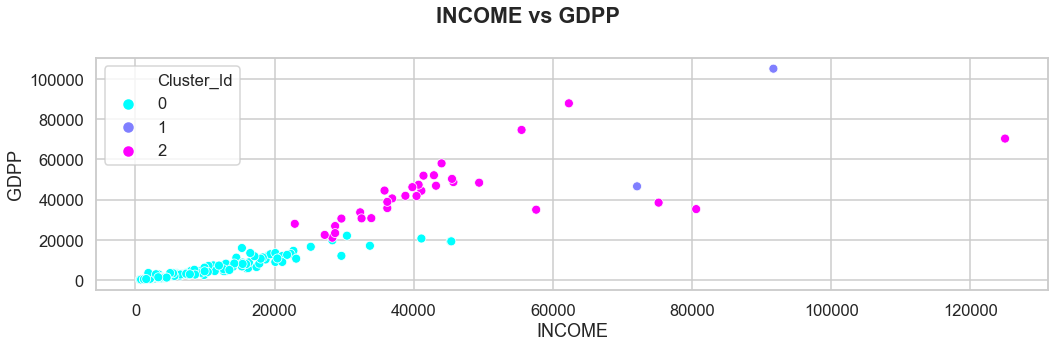

In [54]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_2,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 0 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 0 would be the suitable option

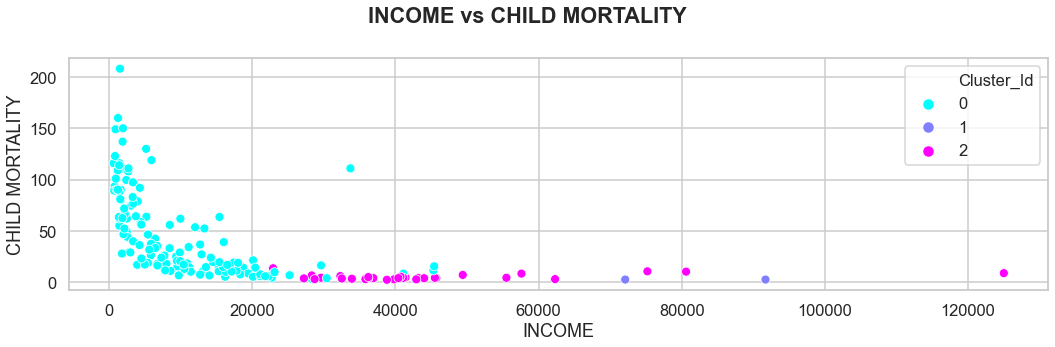

In [55]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_2,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 0 would be the suitable option

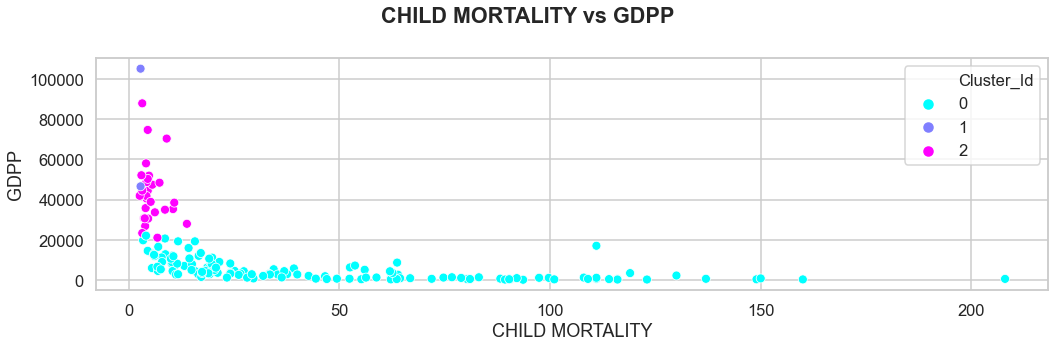

In [56]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_2,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 0 would be the suitable option

In [57]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_kmeans_2= pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).exports.mean())

health_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).health.mean())

imports_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).imports.mean())

income_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).income.mean())

inflation_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_kmeans_2 = pd.DataFrame(country_merge_kmeans_2.groupby(["Cluster_Id"]).gdpp.mean())


# Concatenating all the DF into one
country_analysis_df_kmeans_2= pd.concat([pd.Series([0,1,2]),child_mort_mean_kmeans_2,exports_mean_kmeans_2,health_mean_kmeans_2,
                                   imports_mean_kmeans_2,income_mean_kmeans_2,inflation_mean_kmeans_2,life_expec_mean_kmeans_2,
                                 total_fer_mean_kmeans_2,gdpp_mean_kmeans_2], axis=1)

# Giving the columns new name
country_analysis_df_kmeans_2.columns = ["Cluster_Id","child_mort_mean_km","exports_mean_km","health_mean_km","imports_mean_km","income_mean_km","inflation_mean_km","life_expec_mean_km","total_fer_mean_km","gdpp_mean_km"]
country_analysis_df_kmeans_2

Cluster_Id  child_mort_mean_km  exports_mean_km  health_mean_km  \
0           0           46.420896      2402.567519      323.300411   
1           1            2.800000    138475.000000     5001.930000   
2           2            5.325806     20656.429032     3972.526774   

   imports_mean_km  income_mean_km  inflation_mean_km  life_expec_mean_km  \
0      2415.318672     9858.679104           9.055590           68.160448   
1    115092.000000    81900.000000           1.787000           82.000000   
2     17626.390323    44461.290323           2.662677           80.170968   

   total_fer_mean_km  gdpp_mean_km  
0           3.236418   5122.492537  
1           1.390000  75800.000000  
2           1.801613  42806.451613

From the above consideration of DF, we require data from Low Income, Low Gdpp and High Child_Mortality. so ___Cluster Id 0___ is the data we want

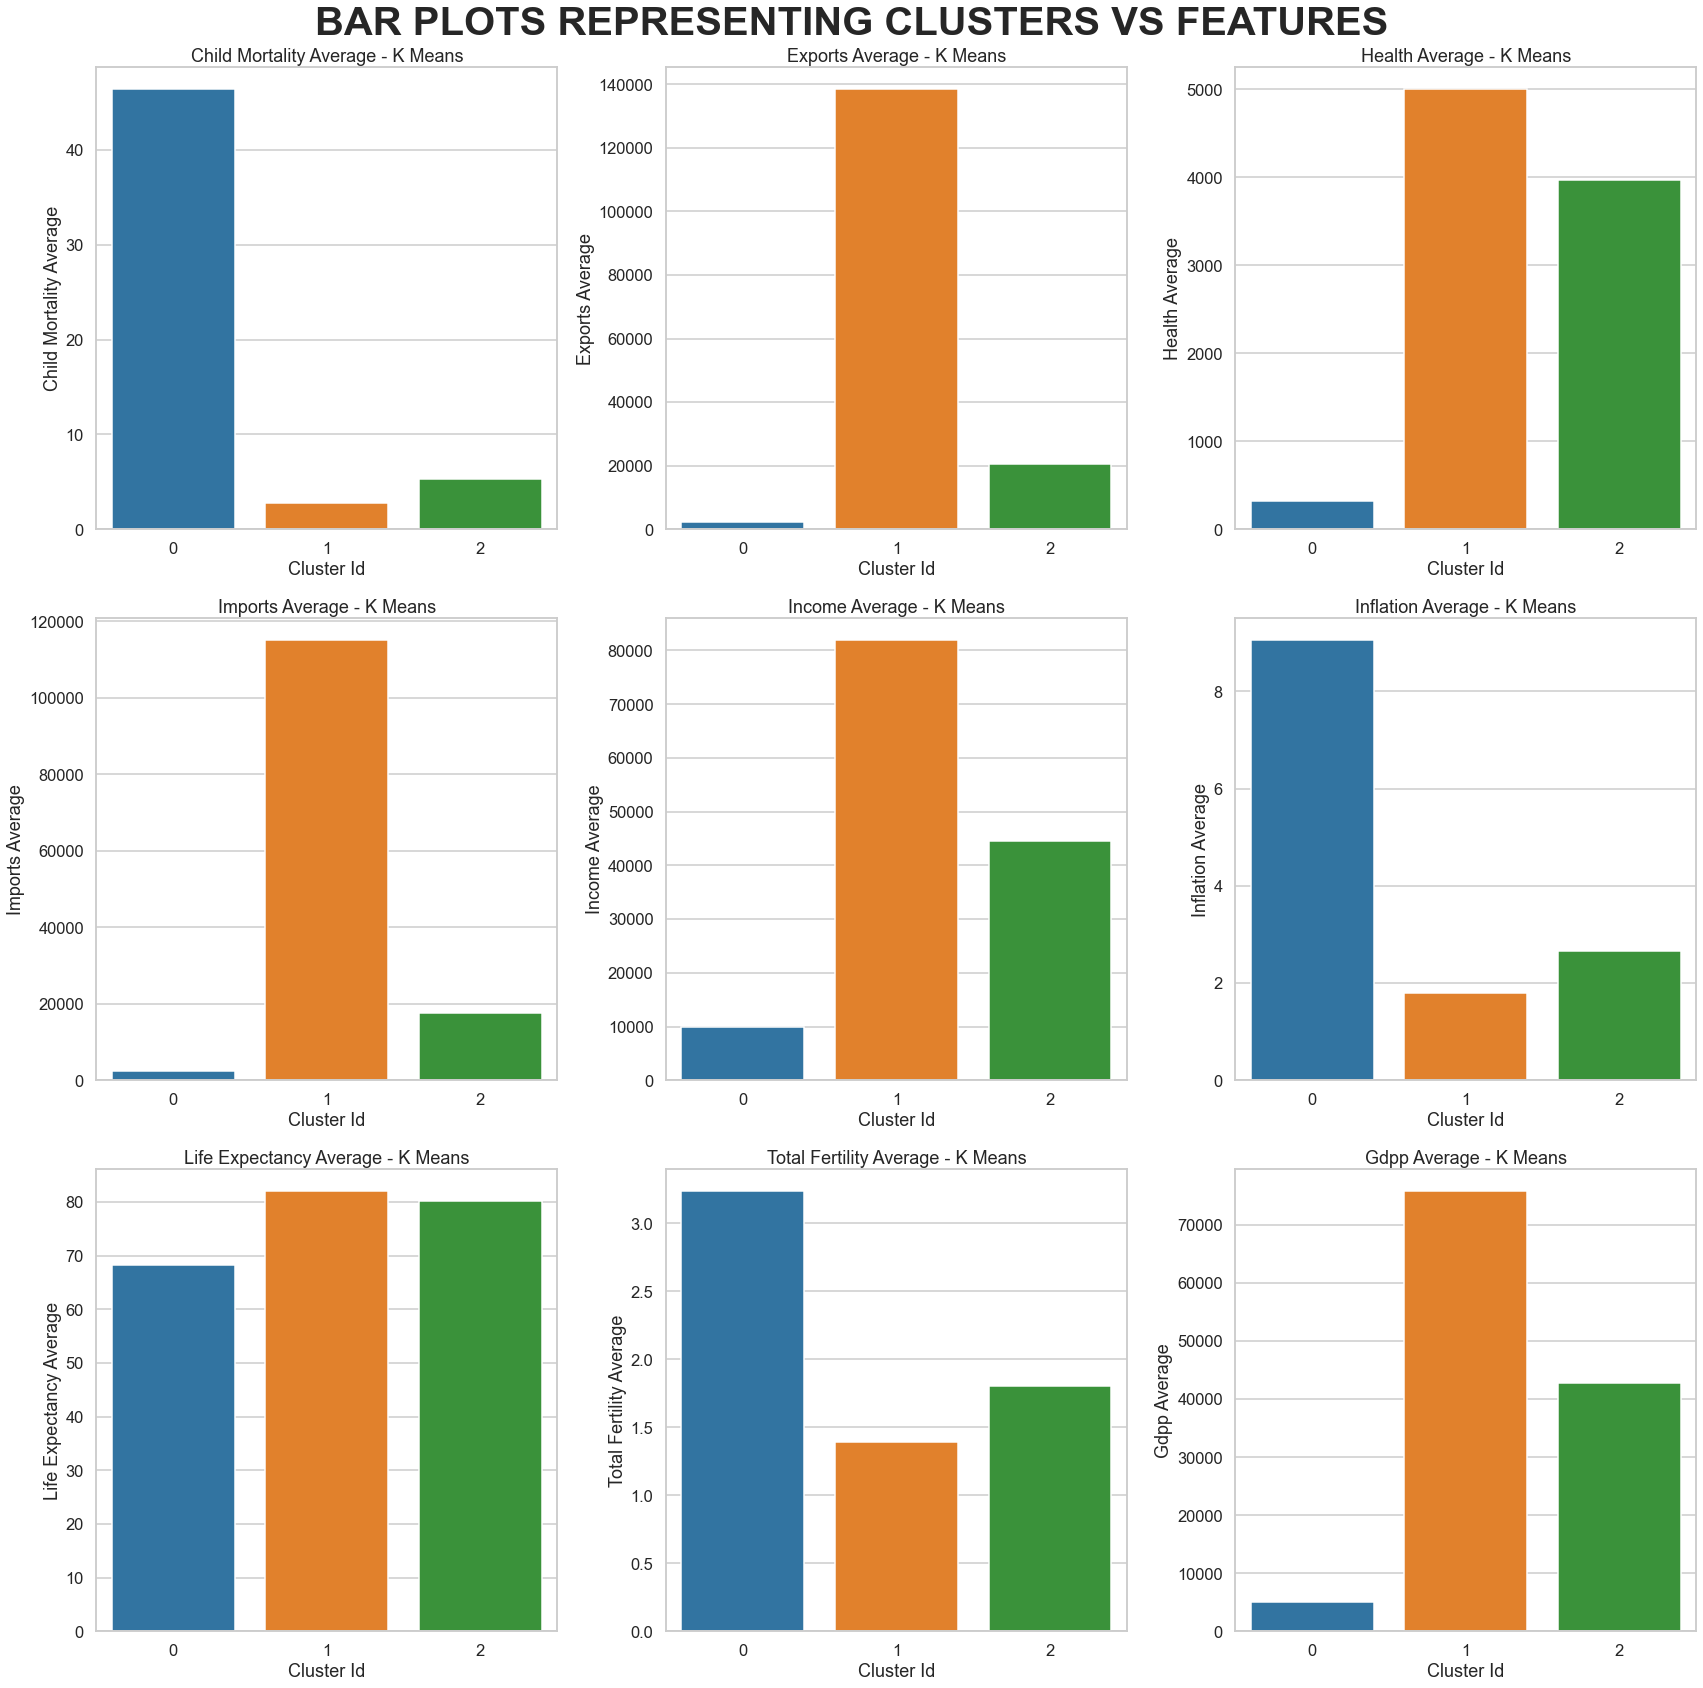

In [58]:
fig = plt.figure(figsize = (24,24))
fig = plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40, weight="bold")
# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.child_mort_mean_km)
plot1.set_title('Child Mortality Average - K Means')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.exports_mean_km)
plot2.set_title('Exports Average - K Means')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.health_mean_km)
plot3.set_title('Health Average - K Means')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.imports_mean_km)
plot4.set_title('Imports Average - K Means')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.income_mean_km)
plot5.set_title('Income Average - K Means')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.inflation_mean_km)
plot6.set_title('Inflation Average - K Means')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.life_expec_mean_km)
plot7.set_title('Life Expectancy Average - K Means')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.total_fer_mean_km)
plot8.set_title('Total Fertility Average - K Means')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_kmeans_2.Cluster_Id, country_analysis_df_kmeans_2.gdpp_mean_km)
plot9.set_title('Gdpp Average - K Means')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 2 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Cluster 1 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 0 is the one we want

### Model 3 with Distinct K , iteration and Random seed

Building the model with ___K = 4___ with the ___iteration of 10___ and ___random seed of 100___ to see the efficiency 

In [59]:
# Building the model using K =4

model_clus4_iter1 = KMeans(n_clusters = 4, max_iter=10,random_state = 100)
model_clus4_iter1.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

Merging the predicted model with the scaled DF to see the Cluster Id

In [60]:
# Concatenating the predicted cluster label with the original DF

k_means = country_scaled
k_means.index = pd.RangeIndex(len(k_means.index))
countries_detail_kmeans_3 = pd.concat([k_means, pd.Series(model_clus4_iter1.labels_).astype(int)], axis=1)

# Giving the columns name
countries_detail_kmeans_3.columns = ['child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1','Cluster_Id']
countries_detail_kmeans_3.head()

child_mort_1  exports_1  health_1  imports_1  income_1  inflation_1  \
0      1.316620  -0.252112 -0.311629  -0.253876 -0.429416     0.453020   
1     -0.050139  -0.092556 -0.060097  -0.008170 -0.001543    -0.100671   
2      0.148561  -0.009486 -0.151273  -0.091129  0.151196     1.197987   
3      1.851439   0.061742 -0.246304  -0.075036 -0.208794     1.902685   
4     -0.167131   0.552428  0.460565   0.726083  0.470044    -0.441834   

   life_expec_1  total_fer_1    gdpp_1  Cluster_Id  
0     -1.469565     1.635492 -0.322877           0  
1      0.278261    -0.364508 -0.044811           0  
2      0.295652     0.230216 -0.015723           0  
3     -1.130435     1.798561 -0.088836           0  
4      0.321739    -0.134293  0.592767           0

Cluster labels from the model 3 has been attached with the scaled DF

In [61]:
# Removing the scaled Data and shows the original data with Cluster labels

country_merge_kmeans_3=pd.merge(country.reset_index(),countries_detail_kmeans_3,left_index=True,right_index=True )

# Dropping the columns
country_merge_kmeans_3=country_merge_kmeans_3.drop(['index','child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1'],axis=1)
country_merge_kmeans_3.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

Unnecessary columns and the scaled values have been removed in order to decide the cluster

In [62]:
# Evaluating the number of elements in the clusters

country_merge_kmeans_3.Cluster_Id.value_counts()

0    130
3     29
1      7
2      1
Name: Cluster_Id, dtype: int64

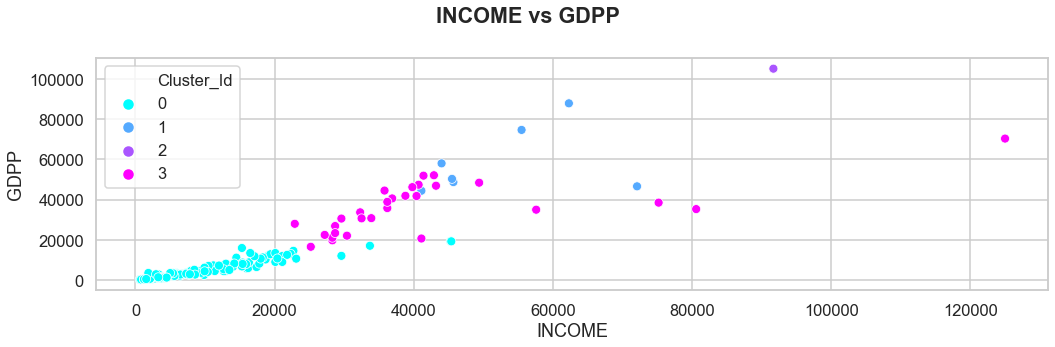

In [63]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_3,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 2 would be the suitable option

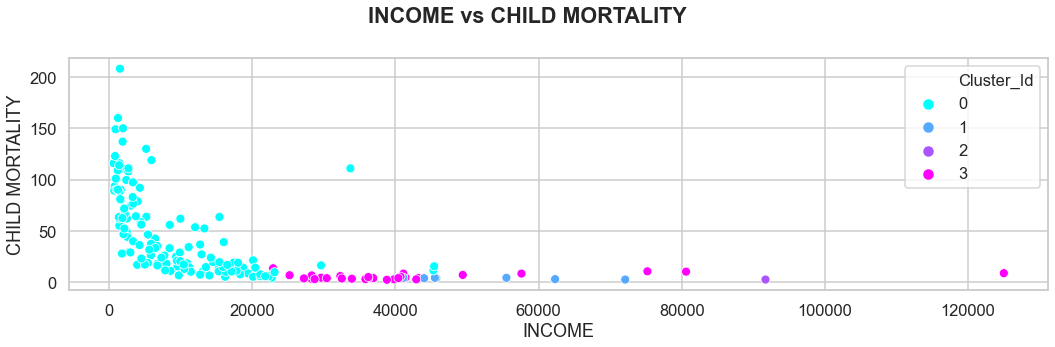

In [64]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_3,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 1 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 2 would be the suitable option

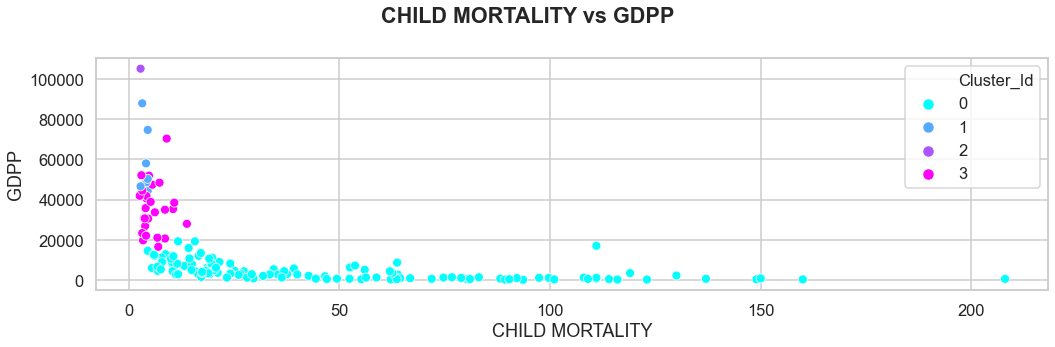

In [65]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_3,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 1 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 2 would be the suitable option

In [66]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_kmeans_3= pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).exports.mean())

health_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).health.mean())

imports_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).imports.mean())

income_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).income.mean())

inflation_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_kmeans_3 = pd.DataFrame(country_merge_kmeans_3.groupby(["Cluster_Id"]).gdpp.mean())


# Concatenating all the DF into one
country_analysis_df_kmeans_3= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_kmeans_3,exports_mean_kmeans_3,health_mean_kmeans_3,
                                   imports_mean_kmeans_3,income_mean_kmeans_3,inflation_mean_kmeans_3,life_expec_mean_kmeans_3,
                                 total_fer_mean_kmeans_3,gdpp_mean_kmeans_3], axis=1)

# Giving the columns new name
country_analysis_df_kmeans_3.columns = ["Cluster_Id","child_mort_mean_km","exports_mean_km","health_mean_km","imports_mean_km","income_mean_km","inflation_mean_km","life_expec_mean_km","total_fer_mean_km","gdpp_mean_km"]
country_analysis_df_kmeans_3

Cluster_Id  child_mort_mean_km  exports_mean_km  health_mean_km  \
0           0           47.671538      2083.894981      290.327347   
1           1            3.971429     46484.171429     5795.975714   
2           2            2.800000    183750.000000     8158.500000   
3           3            5.627586     15834.406897     3103.502069   

   imports_mean_km  income_mean_km  inflation_mean_km  life_expec_mean_km  \
0      2134.901555     9200.484615           9.259954           67.880000   
1     39777.128571    52314.285714           1.278429           80.928571   
2    149100.000000    91700.000000           3.620000           81.300000   
3     13626.817241    41696.551724           2.869069           79.675862   

   total_fer_mean_km   gdpp_mean_km  
0           3.287308    4670.876923  
1           1.741429   58628.571429  
2           1.630000  105000.000000  
3           1.763448   35944.827586

From the above consideration of DF, we require data from Low Income, Low Gdpp and High Child_Mortality. so Cluster Id 2 is the data we want

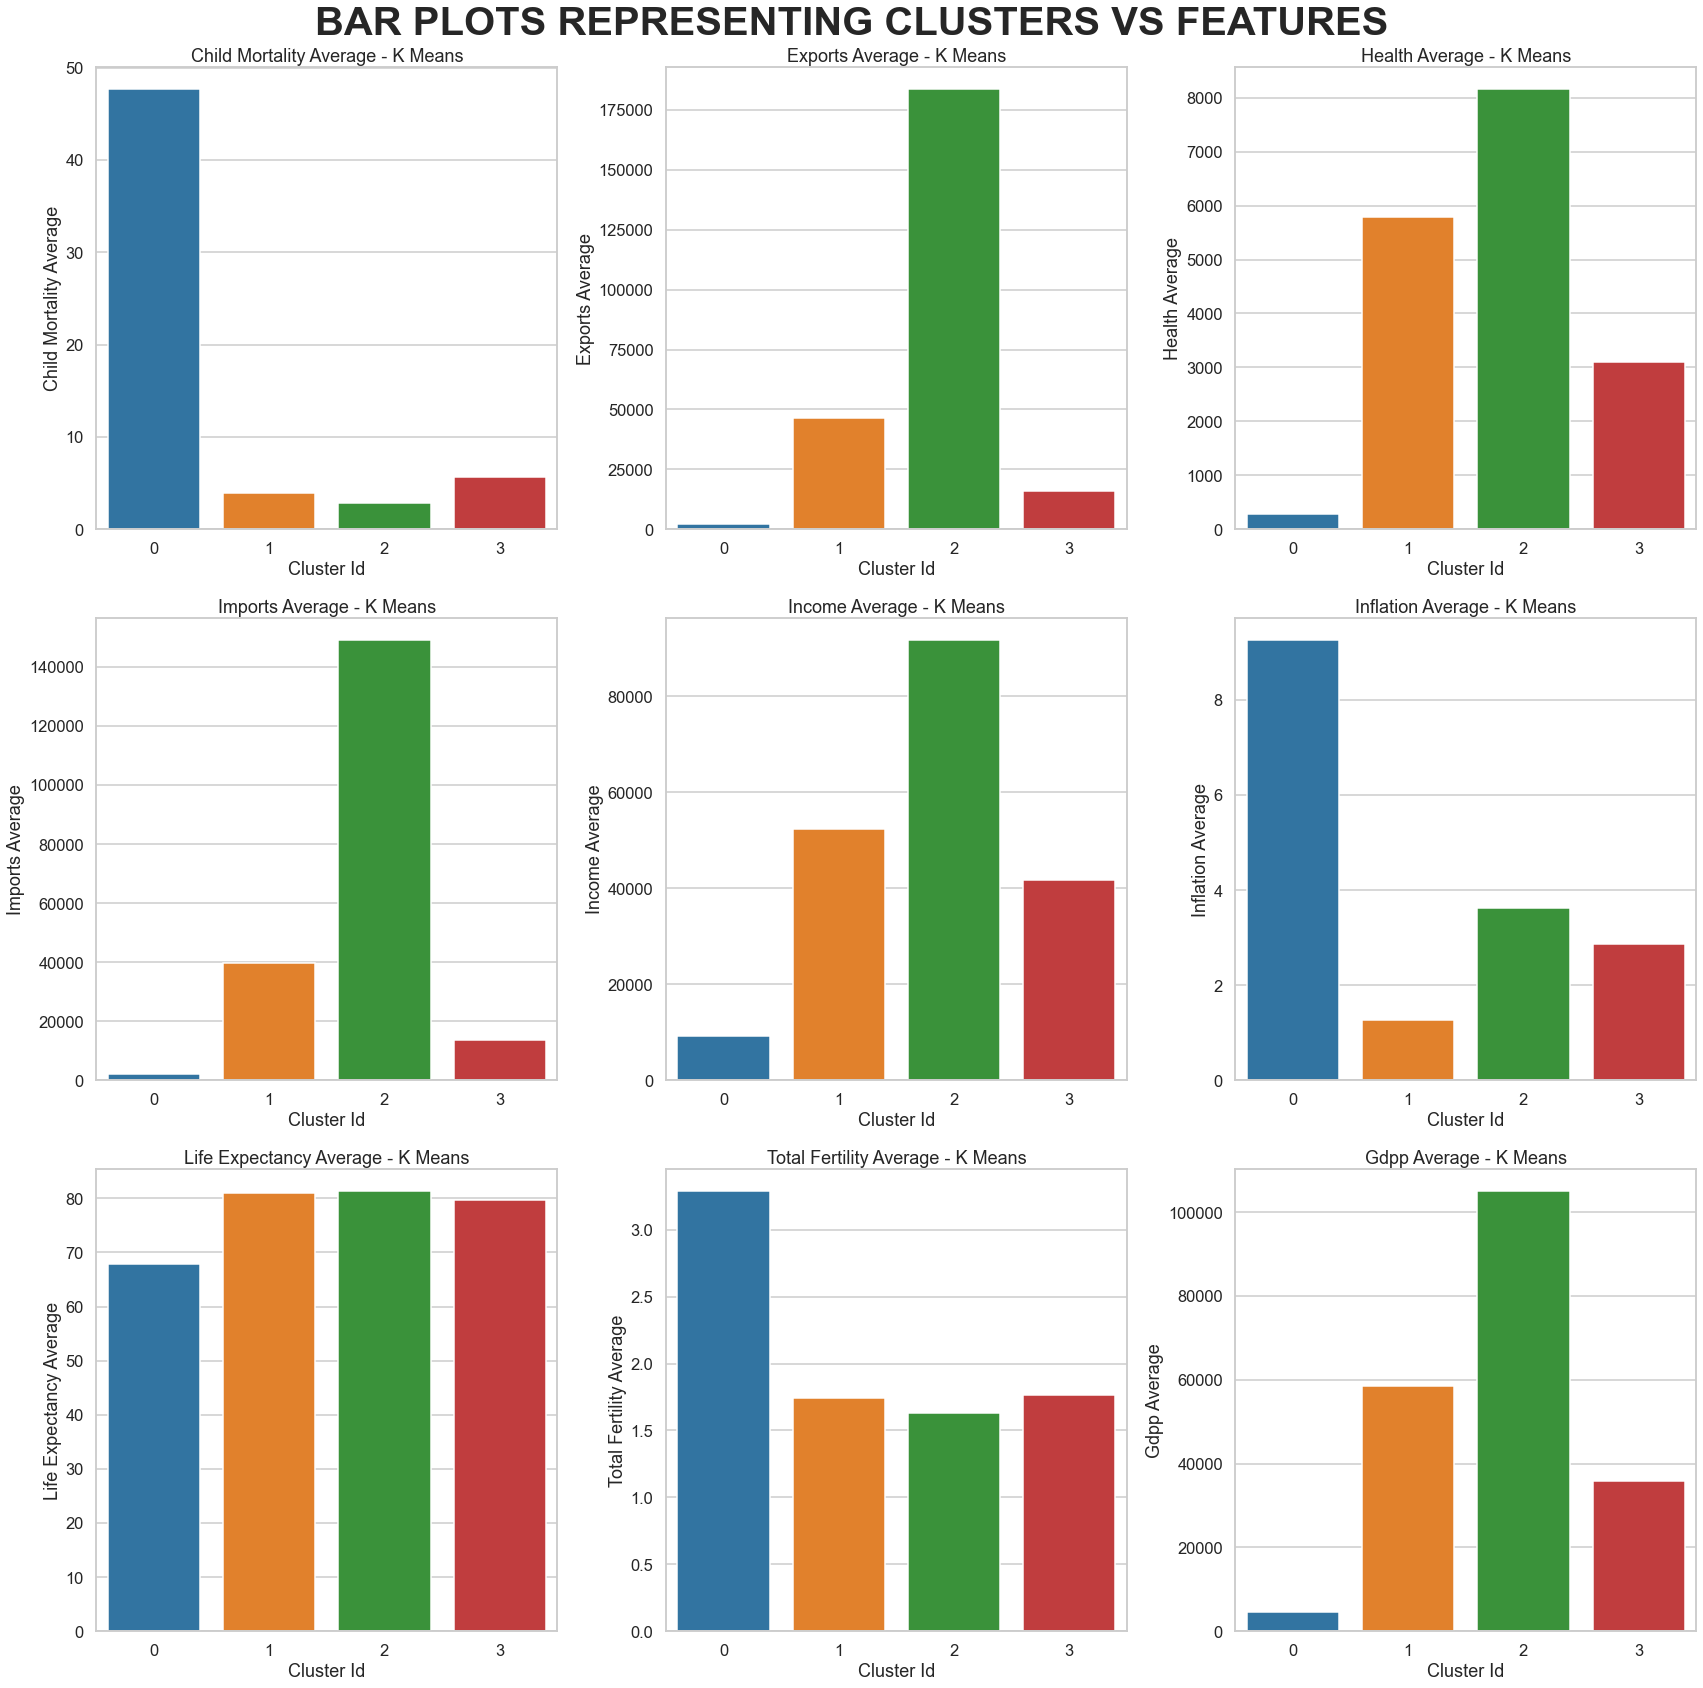

In [67]:
fig = plt.figure(figsize = (24,24))
fig = plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40, weight="bold")
# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.child_mort_mean_km)
plot1.set_title('Child Mortality Average - K Means')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.exports_mean_km)
plot2.set_title('Exports Average - K Means')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.health_mean_km)
plot3.set_title('Health Average - K Means')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.imports_mean_km)
plot4.set_title('Imports Average - K Means')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.income_mean_km)
plot5.set_title('Income Average - K Means')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.inflation_mean_km)
plot6.set_title('Inflation Average - K Means')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.life_expec_mean_km)
plot7.set_title('Life Expectancy Average - K Means')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.total_fer_mean_km)
plot8.set_title('Total Fertility Average - K Means')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_kmeans_3.Cluster_Id, country_analysis_df_kmeans_3.gdpp_mean_km)
plot9.set_title('Gdpp Average - K Means')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 1 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Clusters 0,3 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 2 is the one we want

### Model 4 with Distinct iteration and Random seed

Building the model with ___K = 4___ with the ___iteration of 50___ and ___random seed of 0___ to see the efficiency 

In [68]:
# Building the model using K =4

model_clus4_iter2 = KMeans(n_clusters = 4, max_iter=50,random_state = 0)
model_clus4_iter2.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Merging the predicted model with the scaled DF to see the Cluster Id

In [69]:
# Concatenating the predicted cluster label with the original DF

k_means = country_scaled
k_means.index = pd.RangeIndex(len(k_means.index))
countries_detail_kmeans_4 = pd.concat([k_means, pd.Series(model_clus4_iter1.labels_).astype(int)], axis=1)

# Giving the columns name
countries_detail_kmeans_4.columns = ['child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1','Cluster_Id']
countries_detail_kmeans_4.head()

child_mort_1  exports_1  health_1  imports_1  income_1  inflation_1  \
0      1.316620  -0.252112 -0.311629  -0.253876 -0.429416     0.453020   
1     -0.050139  -0.092556 -0.060097  -0.008170 -0.001543    -0.100671   
2      0.148561  -0.009486 -0.151273  -0.091129  0.151196     1.197987   
3      1.851439   0.061742 -0.246304  -0.075036 -0.208794     1.902685   
4     -0.167131   0.552428  0.460565   0.726083  0.470044    -0.441834   

   life_expec_1  total_fer_1    gdpp_1  Cluster_Id  
0     -1.469565     1.635492 -0.322877           0  
1      0.278261    -0.364508 -0.044811           0  
2      0.295652     0.230216 -0.015723           0  
3     -1.130435     1.798561 -0.088836           0  
4      0.321739    -0.134293  0.592767           0

Cluster labels from the model 3 has been attached with the scaled DF

In [70]:
# Removing the scaled Data and shows the original data with Cluster labels

country_merge_kmeans_4=pd.merge(country.reset_index(),countries_detail_kmeans_4,left_index=True,right_index=True )

# Dropping the columns
country_merge_kmeans_4=country_merge_kmeans_4.drop(['index','child_mort_1','exports_1','health_1','imports_1','income_1','inflation_1','life_expec_1','total_fer_1','gdpp_1'],axis=1)
country_merge_kmeans_4.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

Unnecessary columns and the scaled values have been removed in order to decide the cluster

In [71]:
# Evaluating the number of elements in the clusters

country_merge_kmeans_4.Cluster_Id.value_counts()

0    130
3     29
1      7
2      1
Name: Cluster_Id, dtype: int64

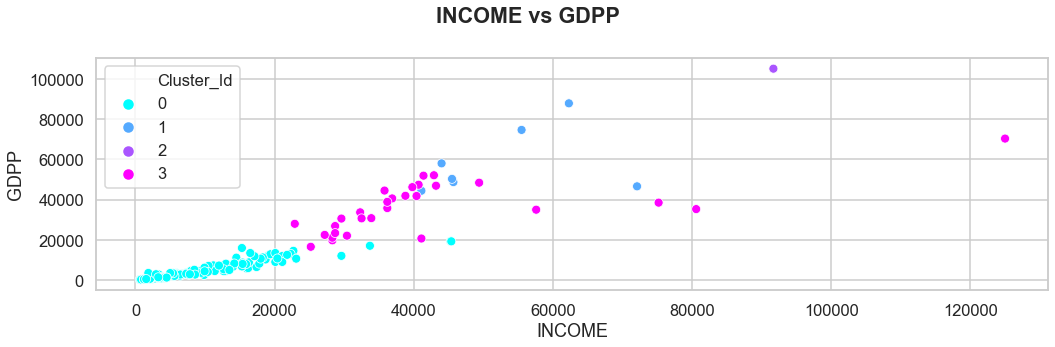

In [72]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_4,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 2 would be the suitable option

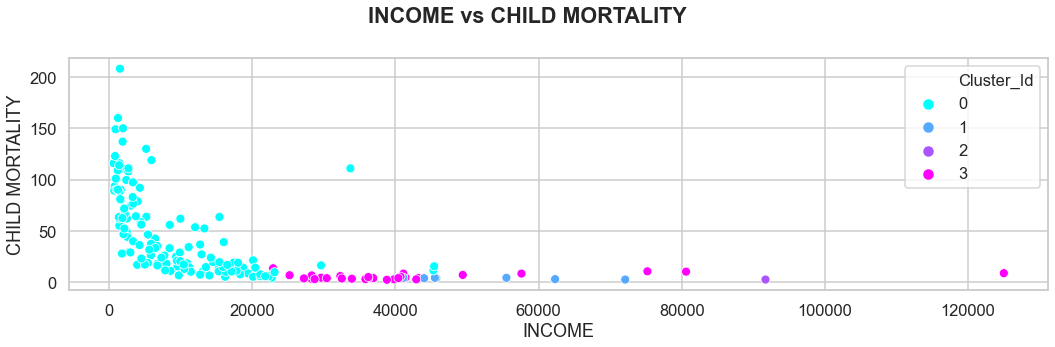

In [73]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_4,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 1 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 2 would be the suitable option

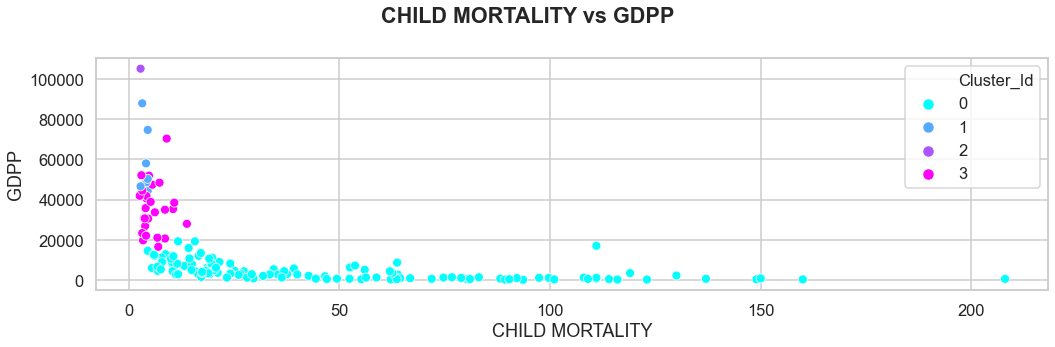

In [74]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_merge_kmeans_4,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 1 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 2 would be the suitable option

In [75]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_kmeans_4= pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).exports.mean())

health_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).health.mean())

imports_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).imports.mean())

income_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).income.mean())

inflation_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_kmeans_4 = pd.DataFrame(country_merge_kmeans_4.groupby(["Cluster_Id"]).gdpp.mean())


# Concatenating all the DF into one
country_analysis_df_kmeans_4= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_kmeans_4,exports_mean_kmeans_4,health_mean_kmeans_4,
                                   imports_mean_kmeans_4,income_mean_kmeans_4,inflation_mean_kmeans_4,life_expec_mean_kmeans_4,
                                 total_fer_mean_kmeans_4,gdpp_mean_kmeans_4], axis=1)

# Giving the columns new name
country_analysis_df_kmeans_4.columns = ["Cluster_Id","child_mort_mean_km","exports_mean_km","health_mean_km","imports_mean_km","income_mean_km","inflation_mean_km","life_expec_mean_km","total_fer_mean_km","gdpp_mean_km"]
country_analysis_df_kmeans_4

Cluster_Id  child_mort_mean_km  exports_mean_km  health_mean_km  \
0           0           47.671538      2083.894981      290.327347   
1           1            3.971429     46484.171429     5795.975714   
2           2            2.800000    183750.000000     8158.500000   
3           3            5.627586     15834.406897     3103.502069   

   imports_mean_km  income_mean_km  inflation_mean_km  life_expec_mean_km  \
0      2134.901555     9200.484615           9.259954           67.880000   
1     39777.128571    52314.285714           1.278429           80.928571   
2    149100.000000    91700.000000           3.620000           81.300000   
3     13626.817241    41696.551724           2.869069           79.675862   

   total_fer_mean_km   gdpp_mean_km  
0           3.287308    4670.876923  
1           1.741429   58628.571429  
2           1.630000  105000.000000  
3           1.763448   35944.827586

From the above consideration of DF, we require data from Low Income, Low Gdpp and High Child_Mortality. so Cluster Id 2 is the data we want

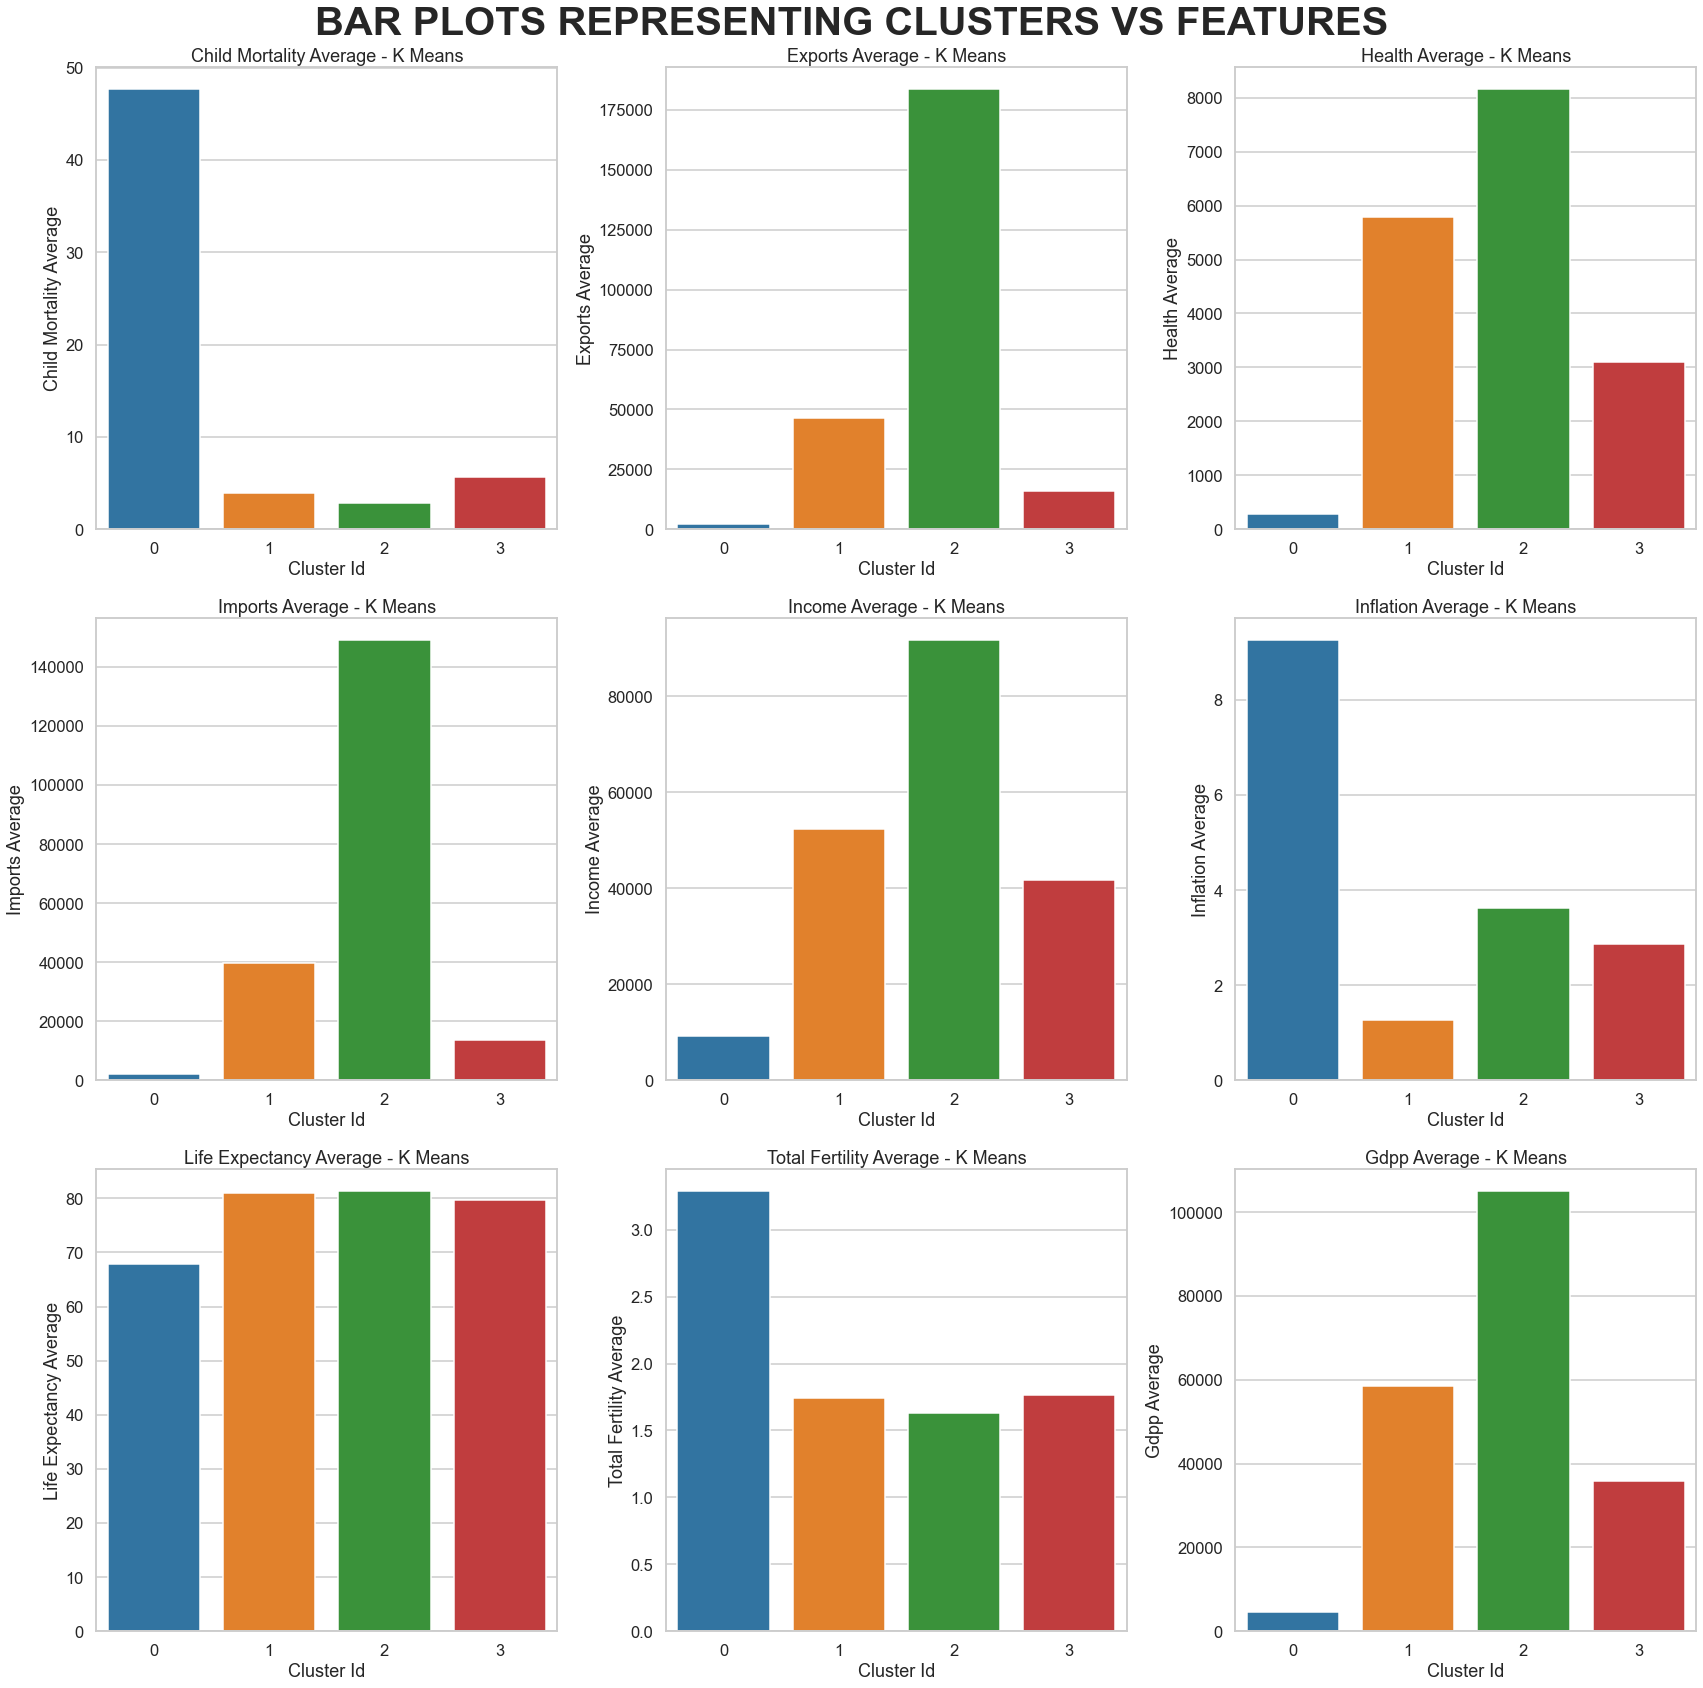

In [76]:
fig = plt.figure(figsize = (24,24))
fig = plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40, weight="bold")

# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.child_mort_mean_km)
plot1.set_title('Child Mortality Average - K Means')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.exports_mean_km)
plot2.set_title('Exports Average - K Means')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.health_mean_km)
plot3.set_title('Health Average - K Means')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.imports_mean_km)
plot4.set_title('Imports Average - K Means')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.income_mean_km)
plot5.set_title('Income Average - K Means')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.inflation_mean_km)
plot6.set_title('Inflation Average - K Means')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.life_expec_mean_km)
plot7.set_title('Life Expectancy Average - K Means')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.total_fer_mean_km)
plot8.set_title('Total Fertility Average - K Means')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_kmeans_4.Cluster_Id, country_analysis_df_kmeans_4.gdpp_mean_km)
plot9.set_title('Gdpp Average - K Means')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 1 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Clusters 0,3 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 2 is the one we want


Upon seeing the above 4 models, we decide to go with ___model 2___ with ___K =3___ with ___Iteration = 50___ and ___Random Seed of 0___  as it would be suitable to see the Cluster

In [77]:
# Filtering only Cluster Id 0 with the three mentioned columns sorted

cluster_kmeans=country_merge_kmeans_1[country_merge_kmeans_1['Cluster_Id']==0]

print("The top 10 countries that CEO should help are as follows as per K Means Clustering:")
cluster_kmeans_final=cluster_kmeans.sort_values(['gdpp','child_mort','income'],ascending=[True,False,True]).head(10)
cluster_kmeans_final

The top 10 countries that CEO should help are as follows as per K Means Clustering:


country  child_mort   exports   health  imports  income  \
26                    Burundi        93.6   20.6052  26.7960   90.552     764   
88                    Liberia        89.3   62.4570  38.5860  302.802     700   
37           Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
112                     Niger       123.0   77.2560  17.9568  170.868     814   
132              Sierra Leone       160.0   67.0320  52.2690  137.655    1220   
93                 Madagascar        62.2  103.2500  15.5701  177.590    1390   
106                Mozambique       101.0  131.9850  21.8299  193.578     918   
31   Central African Republic       149.0   52.6280  17.7508  118.190     888   
94                     Malawi        90.5  104.6520  30.2481  160.191    1030   
50                    Eritrea        55.2   23.0878  12.8212  112.306    1420   

     inflation  life_expec  total_fer  gdpp  Cluster_Id  
26       12.30        57.7       6.26   231           0  
88        5.47        60.8       5.02   327           0  
37       20.80        57.5       6.54   334           0  
112       2.55        58.8       7.49   348           0  
132      17.20        55.0       5.20   399           0  
93        8.79        60.8       4.60   413           0  
106       7.64        54.5       5.56   419           0  
31        2.01        47.5       5.21   446           0  
94       12.10        53.1       5.31   459           0  
50       11.60        61.7       4.61   482           0

Countries such as 

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

are the top 10 countries which we have captured using the ___K - Means Algorithm___

## Hierarchical Clustering Algorithm

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

### Single Linkage Hierarchical Clustering Algorithm

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster

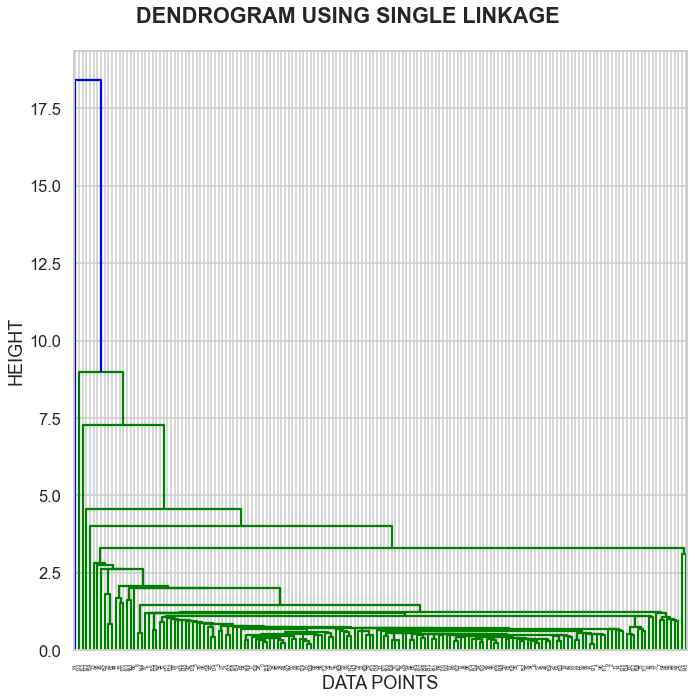

In [78]:
# Importing the necessary Libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Proceeding with Single Linkage Clustering
df_clustering = country_scaled
plt.figure(figsize = (10,10))

# Applying the single method and plotting the mergings with dendrogram
mergings_1 = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings_1)

plt.suptitle("Dendrogram using Single Linkage".upper(),weight="bold")
plt.xlabel("Data Points".upper())
plt.ylabel("Height".upper())
plt.tight_layout()
plt.show()

In [79]:
# Cluster cut tree at 3 and merging it with original dataset

clusterCut = pd.Series(cut_tree(mergings_1, n_clusters = 3).reshape(-1,))

country_hier = pd.concat([country.reset_index(), clusterCut], axis=1)
country_hier = country_hier.drop('index',axis=1)

# Renaming the column name
country_hier.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']
country_hier.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

In [80]:
# Inspect the number of countries in each clusters

country_hier.Cluster_Id.value_counts()

0    165
2      1
1      1
Name: Cluster_Id, dtype: int64

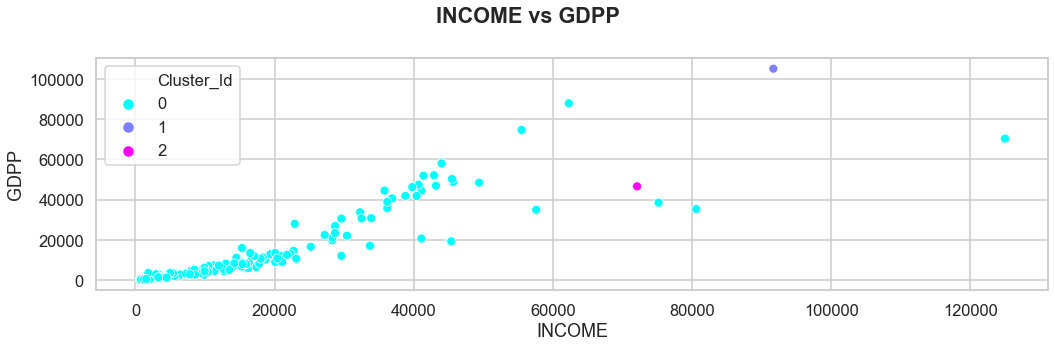

In [81]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hier,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. All the data points are clustered as 0 except only one on 1 in this particular combination
2. There is not a single data point on Cluster 2 which is not good

As seen above, Single Linkage Hierarchical Clustering usually produces loosely architecture and we cannot decide the number of clusters from it

### Complete Linkage Hierarchical Clustering Algorithm

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster

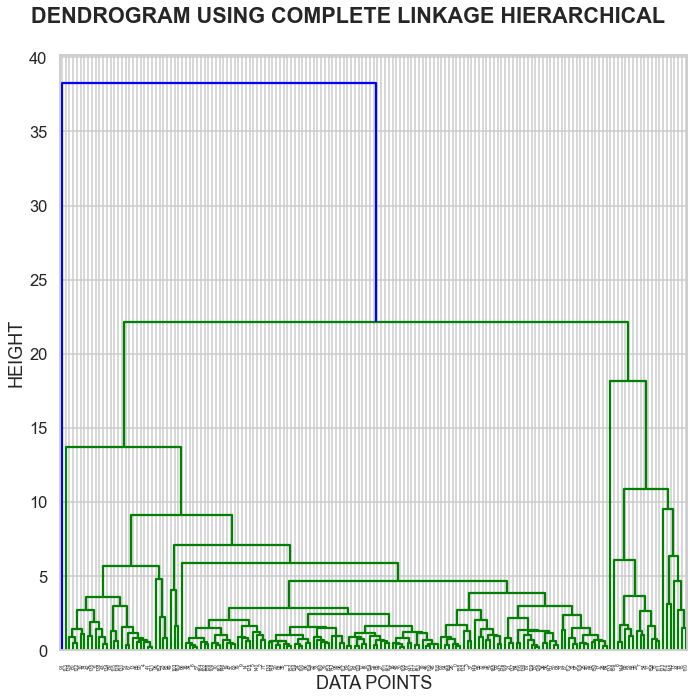

In [82]:
fig = plt.figure(figsize = (10,10))

# Applying the Complete Linkage method
mergings_2 = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings_2)

plt.suptitle("Dendrogram using Complete Linkage Hierarchical".upper(),weight="bold")
plt.xlabel("data points".upper())
plt.ylabel("Height".upper())
plt.tight_layout()
plt.show()

### Model 1 

As seen above, Complete Linkage Hierarchical Clustering is the best method here as we could able to identify the number of clusters we can use it easily. Here we use ___Clusters as 3___

In [83]:
# Cluster cut tree at 3 and merging it with original dataset

clusterCut = pd.Series(cut_tree(mergings_2, n_clusters = 3).reshape(-1,))

country_hierchical = pd.concat([country.reset_index(), clusterCut], axis=1)
country_hierchical = country_hierchical.drop('index',axis=1)

# Renaming the column name
country_hierchical.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']
country_hierchical.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

In [84]:
# Inspect the number of countries in each clusters

country_hierchical.Cluster_Id.value_counts()

0    145
1     21
2      1
Name: Cluster_Id, dtype: int64

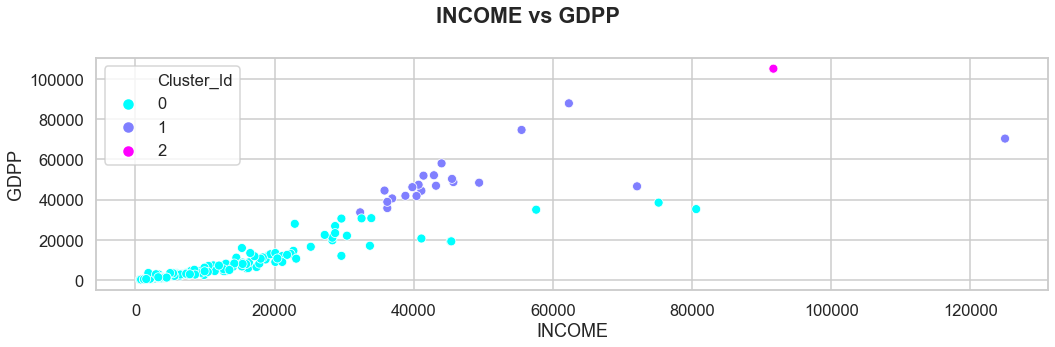

In [85]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 0 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 0 would be the suitable option

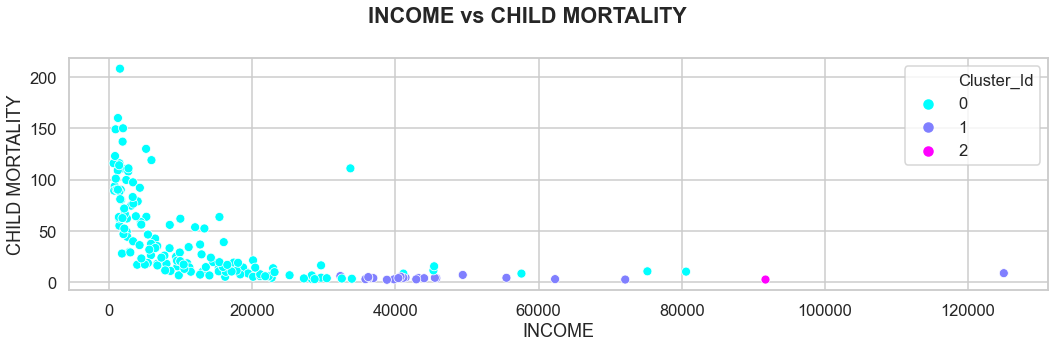

In [86]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 0 would be the suitable option

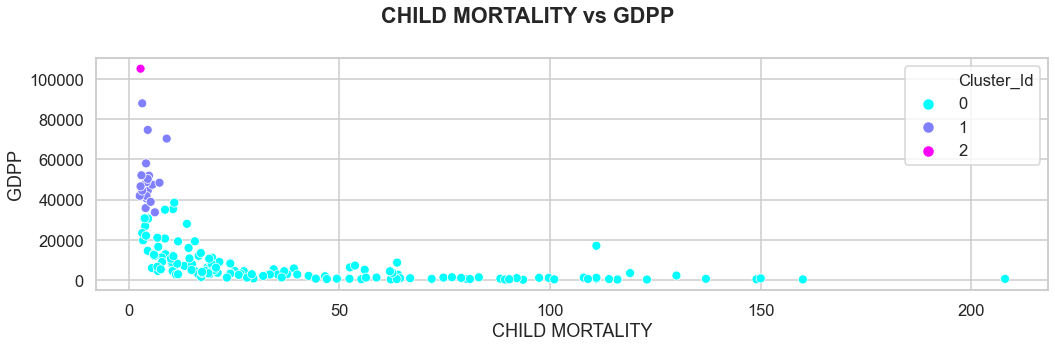

In [87]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 2 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 0 would be the suitable option

In [88]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).exports.mean())

health_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).health.mean())

imports_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).imports.mean())

income_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).income.mean())

inflation_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_hc = pd.DataFrame(country_hierchical.groupby(["Cluster_Id"]).gdpp.mean())

#Concatenating the DF into one
country_analysis_df_hc= pd.concat([pd.Series([0,1,2]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,
                                   income_mean_hc,inflation_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

# Renaming the columns
country_analysis_df_hc.columns = ["Cluster_Id","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

Cluster_Id  child_mort_mean_hc  exports_mean_hc  health_mean_hc  \
0           0           43.406207      3464.913431      449.673346   
1           1            4.495238     26337.185714     4910.157619   
2           2            2.800000    183750.000000     8158.500000   

   imports_mean_hc  income_mean_hc  inflation_mean_hc  life_expec_mean_hc  \
0      3307.776566    12181.124138           8.700379           68.981379   
1     22453.676190    47866.666667           1.637667           80.914286   
2    149100.000000    91700.000000           3.620000           81.300000   

   total_fer_mean_hc   gdpp_mean_hc  
0           3.124690    6960.096552  
1           1.790476   50038.095238  
2           1.630000  105000.000000

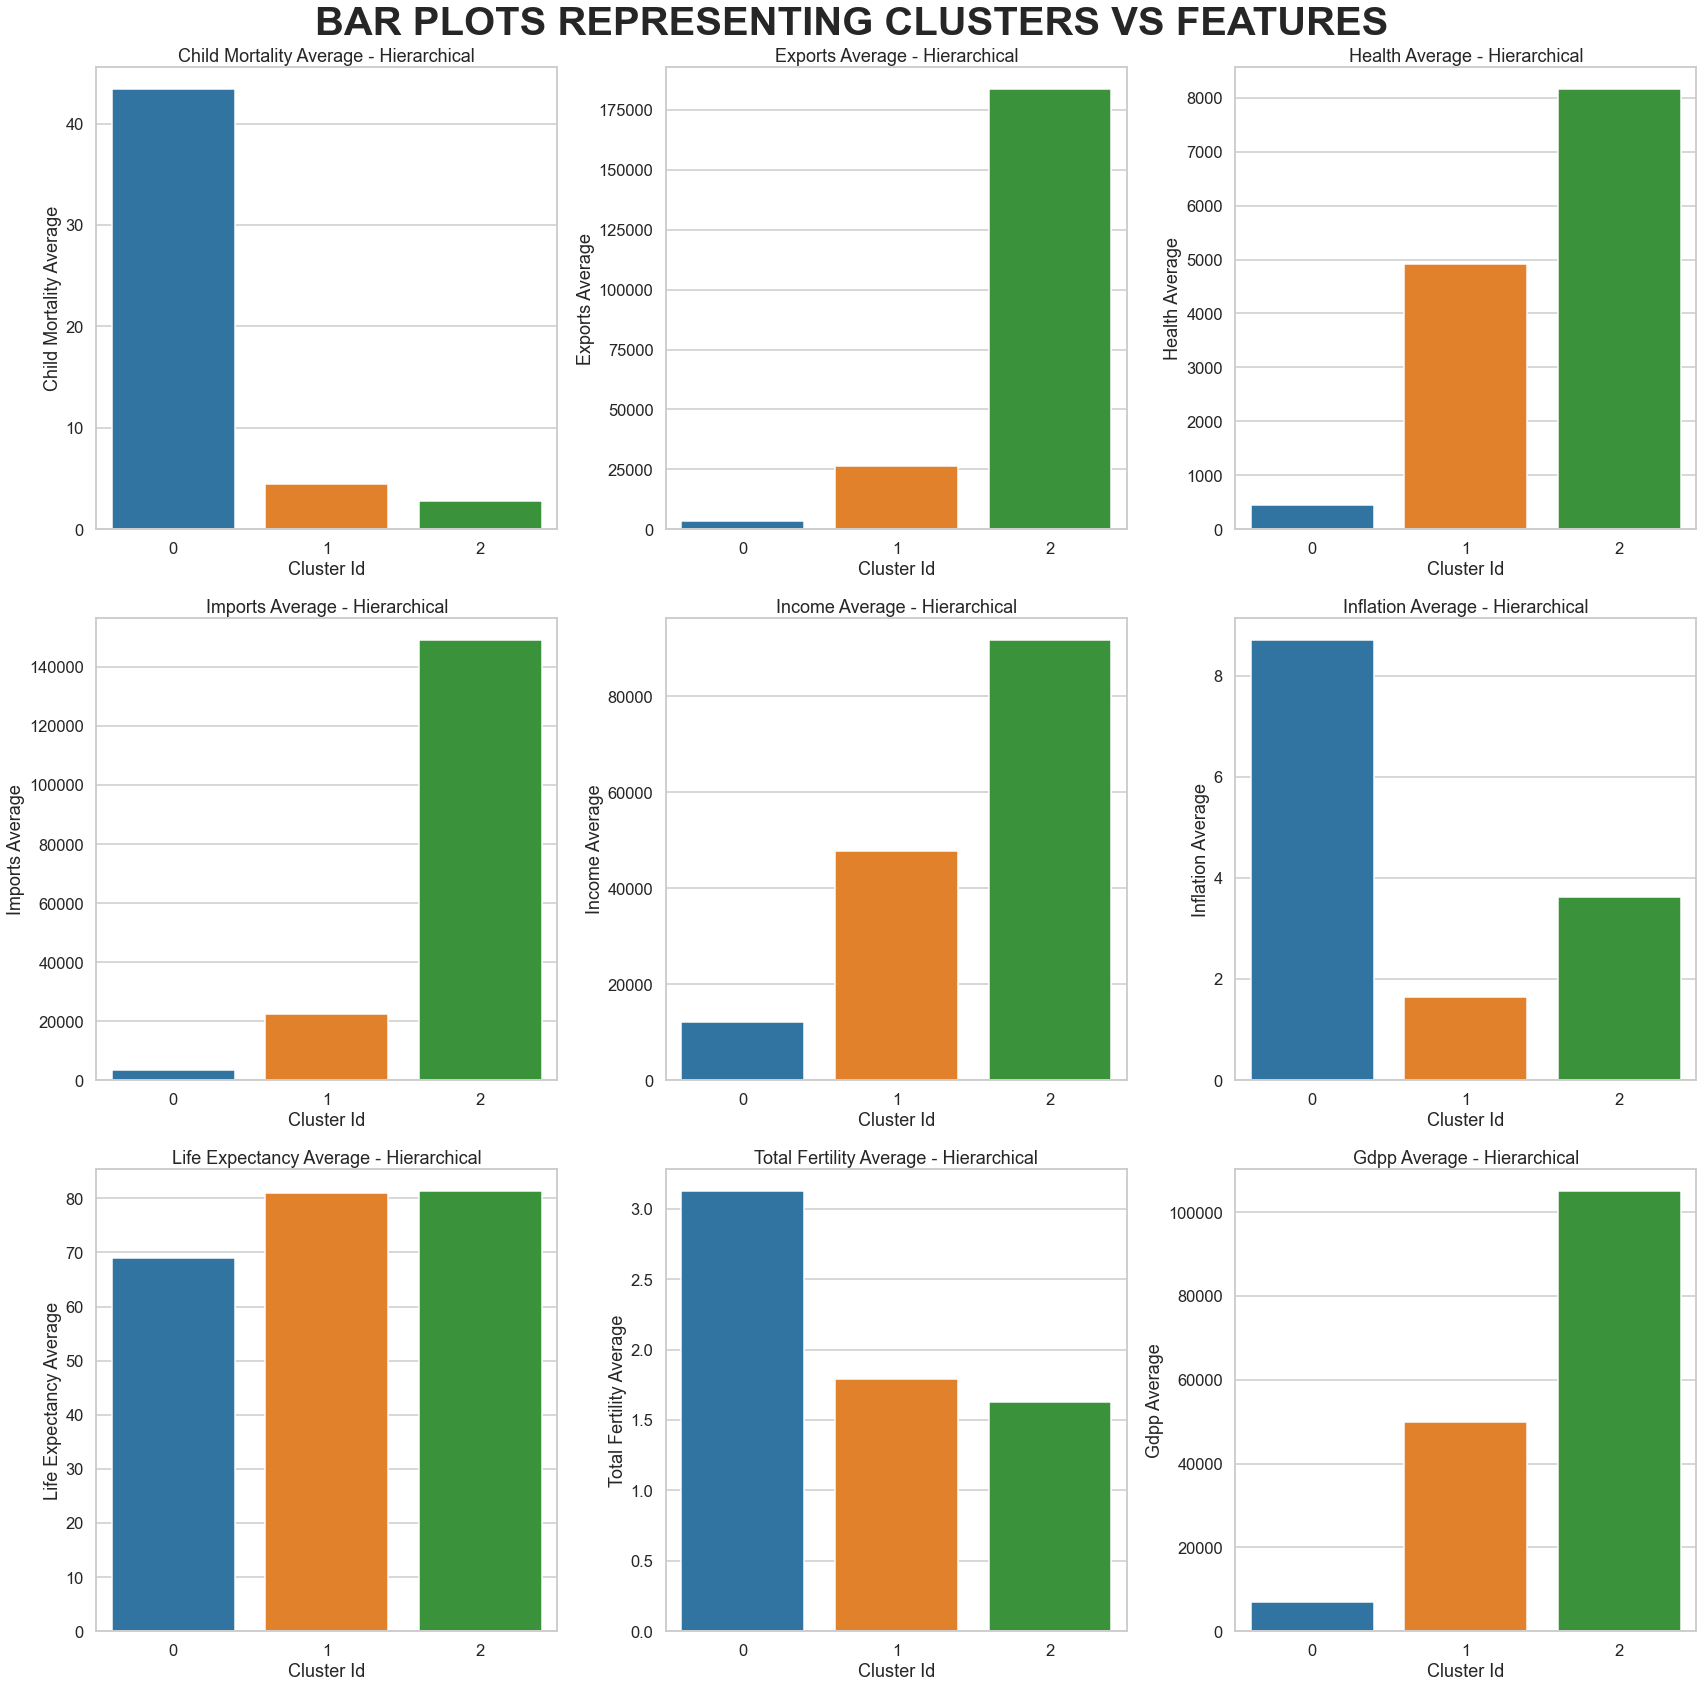

In [89]:
fig =plt.figure(figsize = (24,24))
fig =plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40,weight="bold")

# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.child_mort_mean_hc)
plot1.set_title('Child Mortality Average - Hierarchical')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.exports_mean_hc)
plot2.set_title('Exports Average - Hierarchical')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.health_mean_hc)
plot3.set_title('Health Average - Hierarchical')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.imports_mean_hc)
plot4.set_title('Imports Average - Hierarchical')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.income_mean_hc)
plot5.set_title('Income Average - Hierarchical')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.inflation_mean_hc)
plot6.set_title('Inflation Average - Hierarchical')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.life_expec_mean_hc)
plot7.set_title('Life Expectancy Average - Hierarchical')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.total_fer_mean_hc)
plot8.set_title('Total Fertility Average - Hierarchical')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_hc.Cluster_Id, country_analysis_df_hc.gdpp_mean_hc)
plot9.set_title('Gdpp Average - Hierarchical')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 2 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Cluster 1 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 0 is the one we want

### Model 2

As seen above, Complete Linkage Hierarchical Clustering is the best method here as we could able to identify the number of clusters we can use it easily. Here we use ___Clusters as 4___

In [90]:
# Cluster cut tree at 3 and merging it with original dataset

clusterCut_2 = pd.Series(cut_tree(mergings_2, n_clusters = 4).reshape(-1,))

country_hierchical_2 = pd.concat([country.reset_index(), clusterCut_2], axis=1)
country_hierchical_2 = country_hierchical_2.drop('index',axis=1)

# Renaming the column name
country_hierchical_2.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']
country_hierchical_2.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  Cluster_Id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           0  
2      16.10        76.5       2.89   4460           0  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           0

In [91]:
# Inspect the number of countries in each clusters

country_hierchical_2.Cluster_Id.value_counts()

0    145
1     20
3      1
2      1
Name: Cluster_Id, dtype: int64

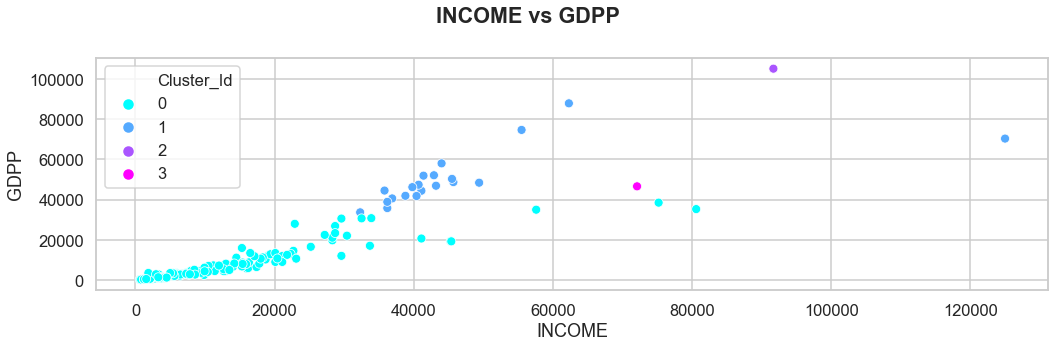

In [92]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical_2,column1='income',column2='gdpp',hue='Cluster_Id',xlabel='Income',ylabel='Gdpp') 

__Inferences from the above plot:__

1. Cluster 3 shows small cluster with Income and Gdpp
2. With Lower income and Lower Gdpp, Cluster 0 would be the suitable option

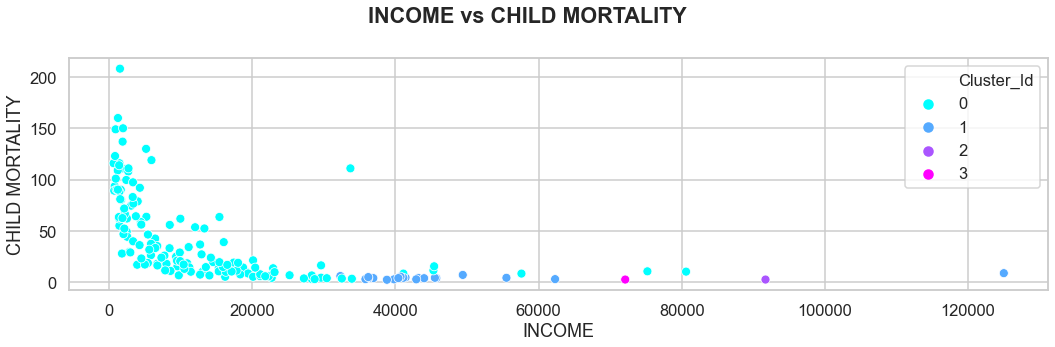

In [93]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical_2,column1='income',column2='child_mort',hue='Cluster_Id',xlabel='Income',ylabel='child mortality') 

__Inferences from the above plot:__

1. Cluster 3 shows small cluster with Income and Child Mortality
2. With Lower income and Higher Child Mortality, Cluster 0 would be the suitable option

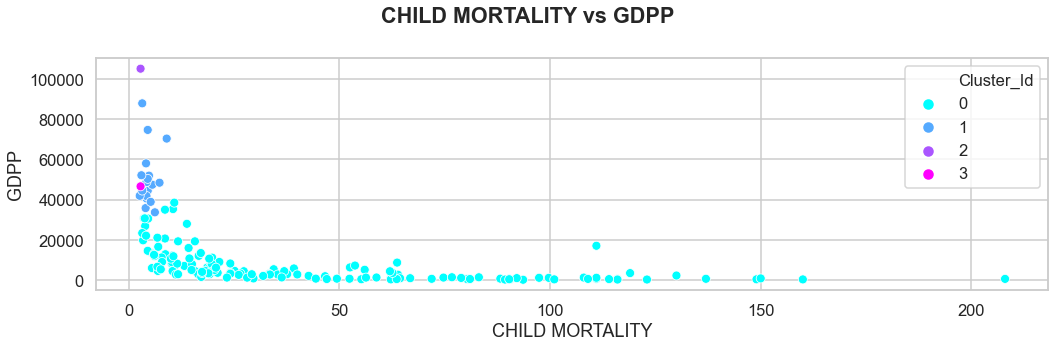

In [94]:
# Passing the value with the function to get scatter plot

biscatter(data1=country_hierchical_2,column1='child_mort',column2='gdpp',hue='Cluster_Id',xlabel='Child mortality',ylabel='gdpp') 

__Inferences from the above plot:__

1. Cluster 3 shows small cluster with Gdpp and Child Mortality
2. With Lower gdpp and Higher Child Mortality, Cluster 0 would be the suitable option

In [95]:
# Computing the mean for all columns for all cluster Id and see the difference to choose the Cluster label

child_mort_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).child_mort.mean())

exports_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).exports.mean())

health_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).health.mean())

imports_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).imports.mean())

income_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).income.mean())

inflation_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).inflation.mean())

life_expec_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).life_expec.mean())

total_fer_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).total_fer.mean())

gdpp_mean_hc_2 = pd.DataFrame(country_hierchical_2.groupby(["Cluster_Id"]).gdpp.mean())

#Concatenating the DF into one
country_analysis_df_hc_2= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc_2,exports_mean_hc_2,health_mean_hc_2,
                                     imports_mean_hc_2,income_mean_hc_2,inflation_mean_hc_2,life_expec_mean_hc_2,
                                 total_fer_mean_hc_2,gdpp_mean_hc_2], axis=1)

# Renaming the columns
country_analysis_df_hc_2.columns = ["Cluster_Id","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc_2

Cluster_Id  child_mort_mean_hc  exports_mean_hc  health_mean_hc  \
0           0           43.406207      3464.913431      449.673346   
1           1            4.580000     22994.045000     5063.397500   
2           2            2.800000    183750.000000     8158.500000   
3           3            2.800000     93200.000000     1845.360000   

   imports_mean_hc  income_mean_hc  inflation_mean_hc  life_expec_mean_hc  \
0      3307.776566    12181.124138           8.700379           68.981379   
1     19522.160000    46655.000000           1.721850           80.825000   
2    149100.000000    91700.000000           3.620000           81.300000   
3     81084.000000    72100.000000          -0.046000           82.700000   

   total_fer_mean_hc   gdpp_mean_hc  
0            3.12469    6960.096552  
1            1.82250   50210.000000  
2            1.63000  105000.000000  
3            1.15000   46600.000000

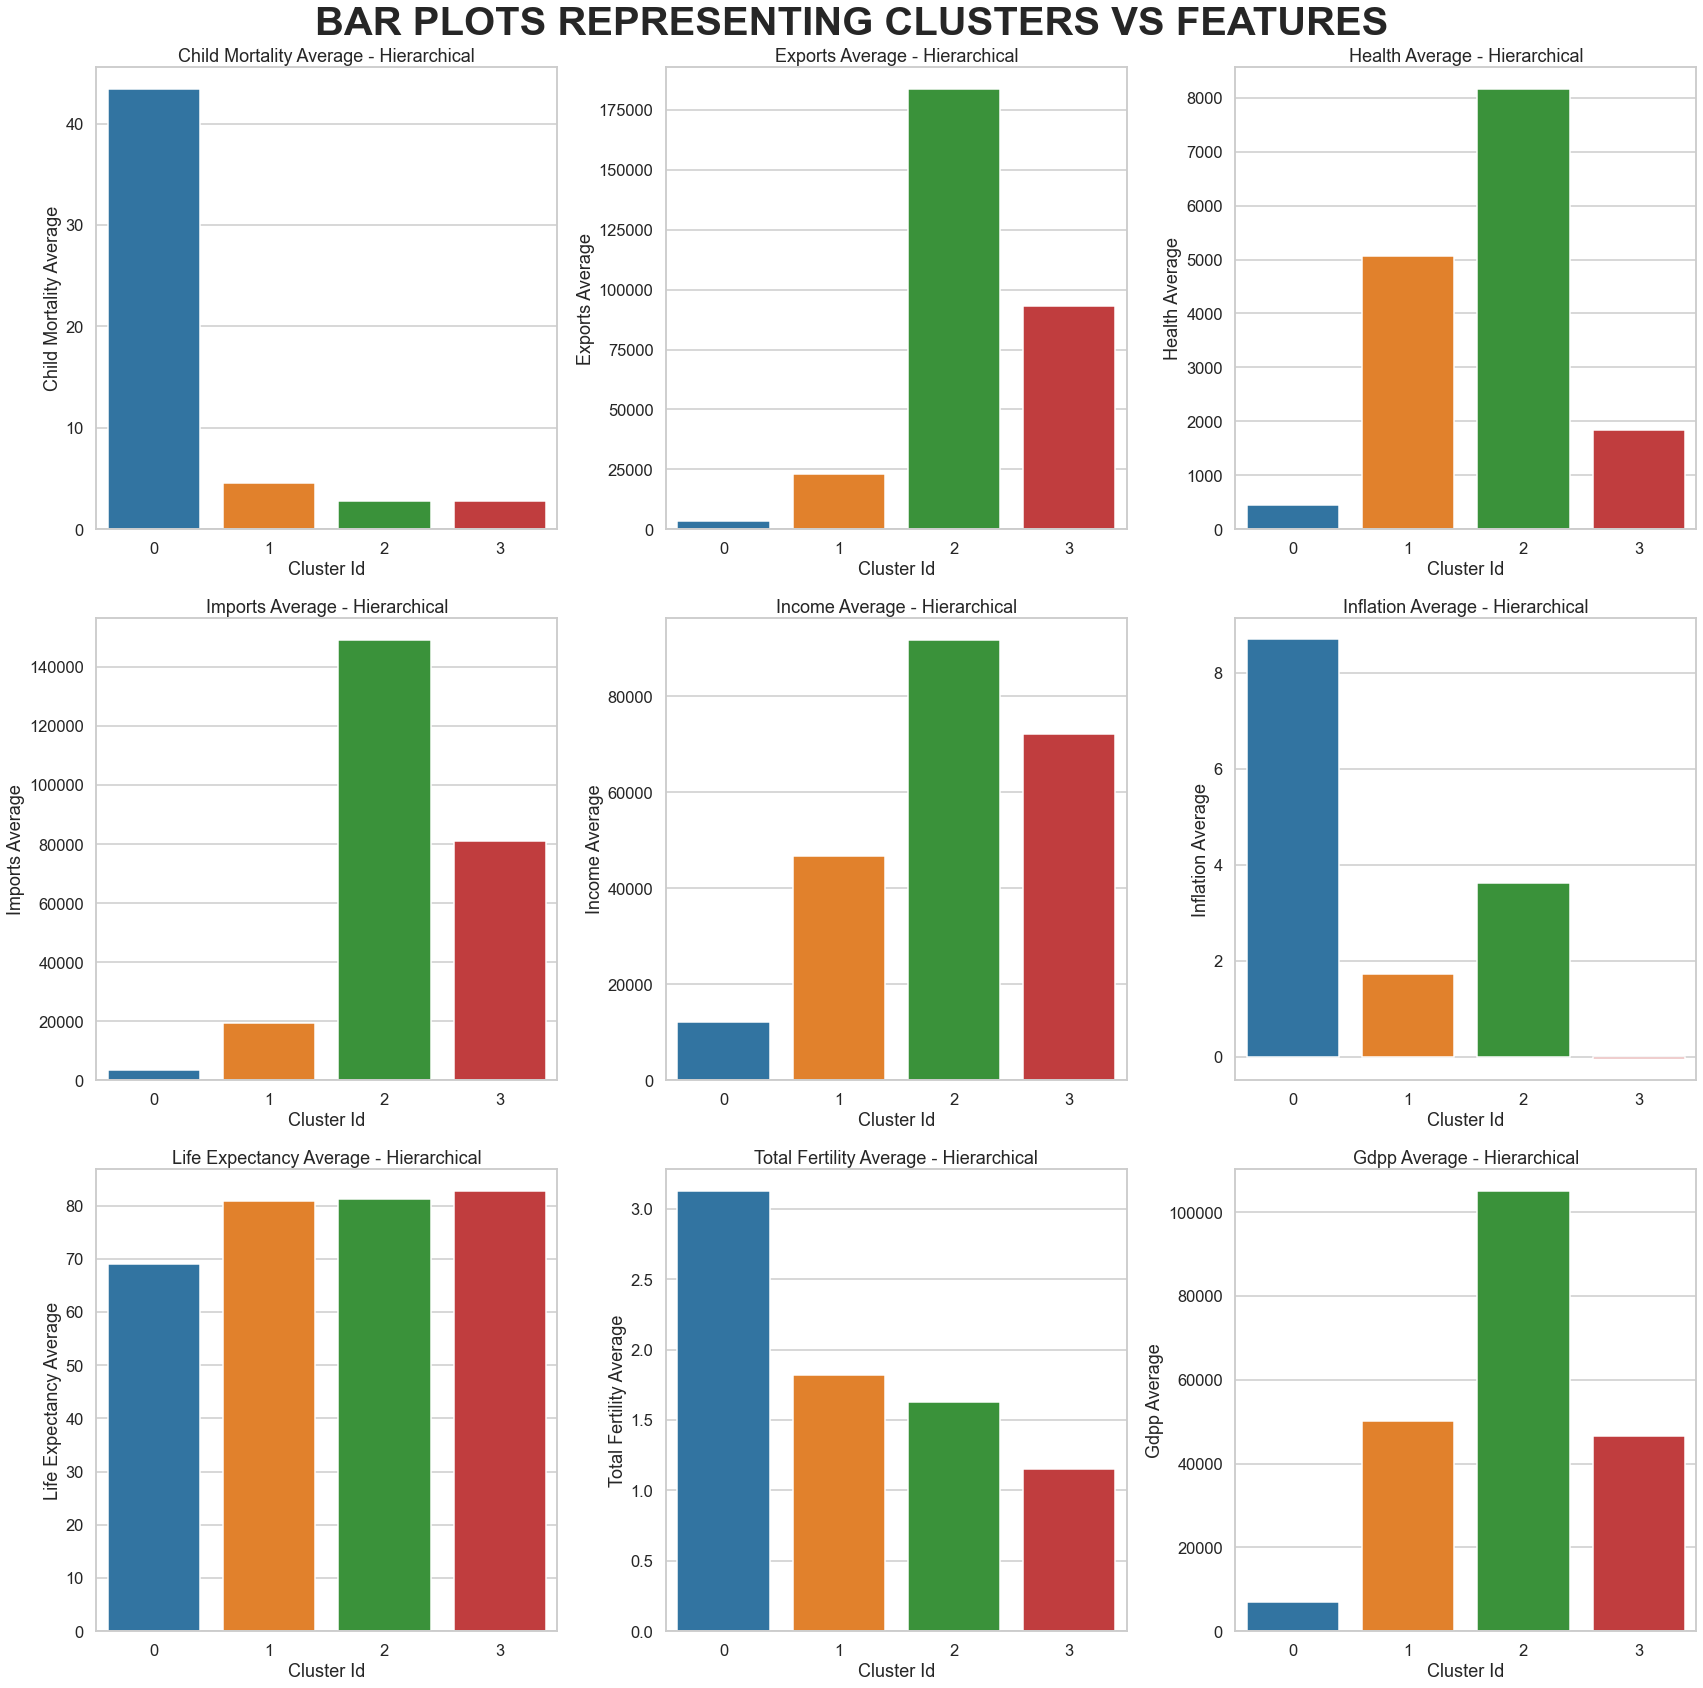

In [96]:
fig =plt.figure(figsize = (24,24))
fig =plt.figure(1)
fig.suptitle("Bar Plots representing Clusters vs Features".upper(),fontsize = 40,weight="bold")

# subplot 1
plt.subplot(3, 3, 1)
plot1=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.child_mort_mean_hc)
plot1.set_title('Child Mortality Average - Hierarchical')
plot1.set_xlabel('Cluster Id')
plot1.set_ylabel('Child Mortality Average')

# subplot 2 
plt.subplot(3, 3, 2)
plot2=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.exports_mean_hc)
plot2.set_title('Exports Average - Hierarchical')
plot2.set_xlabel('Cluster Id')
plot2.set_ylabel('Exports Average')

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plot3=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.health_mean_hc)
plot3.set_title('Health Average - Hierarchical')
plot3.set_xlabel('Cluster Id')
plot3.set_ylabel('Health Average')

# subplot 4 
plt.subplot(3, 3, 4)
plot4=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.imports_mean_hc)
plot4.set_title('Imports Average - Hierarchical')
plot4.set_xlabel('Cluster Id')
plot4.set_ylabel('Imports Average')


# subplot 5 
plt.subplot(3, 3, 5)
plot5=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.income_mean_hc)
plot5.set_title('Income Average - Hierarchical')
plot5.set_xlabel('Cluster Id')
plot5.set_ylabel('Income Average')


# subplot 6 
plt.subplot(3, 3, 6)
plot6=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.inflation_mean_hc)
plot6.set_title('Inflation Average - Hierarchical')
plot6.set_xlabel('Cluster Id')
plot6.set_ylabel('Inflation Average')


# subplot 7 
plt.subplot(3, 3, 7)
plot7=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.life_expec_mean_hc)
plot7.set_title('Life Expectancy Average - Hierarchical')
plot7.set_xlabel('Cluster Id')
plot7.set_ylabel('Life Expectancy Average')

# subplot 8
plt.subplot(3, 3, 8)
plot8=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.total_fer_mean_hc)
plot8.set_title('Total Fertility Average - Hierarchical')
plot8.set_xlabel('Cluster Id')
plot8.set_ylabel('Total Fertility Average')

# subplot 9
plt.subplot(3, 3, 9)
plot9=sns.barplot(country_analysis_df_hc_2.Cluster_Id, country_analysis_df_hc_2.gdpp_mean_hc)
plot9.set_title('Gdpp Average - Hierarchical')
plot9.set_xlabel('Cluster Id')
plot9.set_ylabel('Gdpp Average')

plt.tight_layout()
plt.show()

__Inference from the above plot__:
1. From the Average of Income, Gdpp, and Child Mortality , Cluster 3 is the reverse of all we want
2. From the Average of Income, Gdpp, and Child Mortality , Clusters 1,2 does not suit at all 
3. From the Average of Income, Gdpp, and Child Mortality , Cluster 0 is the one we want

Upon seeing the created 2 models with Hierarchical, We decide to go with ___model with 3 Clusters___ and will evaluate the countries in the same

In [97]:
# Filtering only Cluster Id 0 with the three mentioned columns sorted

cluster_hc=country_hierchical[country_hierchical['Cluster_Id']==0]

print('The top 10 countries that CEO should help are as follows as per Hierarchical Clustering:')
cluster_hc_final = cluster_hc.sort_values(['gdpp','child_mort','income'],ascending=[True,False,True]).head(10)
cluster_hc_final

The top 10 countries that CEO should help are as follows as per Hierarchical Clustering:


country  child_mort   exports   health  imports  income  \
26                    Burundi        93.6   20.6052  26.7960   90.552     764   
88                    Liberia        89.3   62.4570  38.5860  302.802     700   
37           Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
112                     Niger       123.0   77.2560  17.9568  170.868     814   
132              Sierra Leone       160.0   67.0320  52.2690  137.655    1220   
93                 Madagascar        62.2  103.2500  15.5701  177.590    1390   
106                Mozambique       101.0  131.9850  21.8299  193.578     918   
31   Central African Republic       149.0   52.6280  17.7508  118.190     888   
94                     Malawi        90.5  104.6520  30.2481  160.191    1030   
50                    Eritrea        55.2   23.0878  12.8212  112.306    1420   

     inflation  life_expec  total_fer  gdpp  Cluster_Id  
26       12.30        57.7       6.26   231           0  
88        5.47        60.8       5.02   327           0  
37       20.80        57.5       6.54   334           0  
112       2.55        58.8       7.49   348           0  
132      17.20        55.0       5.20   399           0  
93        8.79        60.8       4.60   413           0  
106       7.64        54.5       5.56   419           0  
31        2.01        47.5       5.21   446           0  
94       12.10        53.1       5.31   459           0  
50       11.60        61.7       4.61   482           0

Countries such as 

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

are the top 10 countries which we have captured using the ___Complete Linkage Hierarchical Algorithm___

# Comparing the Algorithm Results

 |S.no| Top 10 Countries Captured by K- Means | Top 10 Countries Captured by Hierarchical |
 |---|---|---|
 | 1 | Burundi | Burundi |
 | 2 | Liberia | Liberia |
 | 3 | Congo, Dem. Rep. | Congo, Dem. Rep. |
 | 4 | Niger | Niger |
 | 5 | Sierra Leone | Sierra Leone |
 | 6 | Madagascar | Madagascar |
 | 7 | Mozambique | Mozambique |
 | 8 | Central African Republic | Central African Republic |
 | 9 | Malawi  | Malawi  |
 | 10 | Eritrea | Eritrea |
 
 
 Since both the Clustering Algorithm given us the same set of 10 countries to consider for helping, we generated the useful insight in helping our CEO
 
 
### Recommendation of Clustering Algorithm:
 
- K – Means Clustering is very well suited for working with large datasets because of its time complexity $O(n)$, Hierarchical will not be suitable for larger datasets as the time complexity goes to $O(n^{2})$
- The results produced by Hierarchical Clustering is reproducible, whereas K – Means will produce distinct results on processing it for multiple times


# Conclusion

As a Data Analyst, my job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

Hence I would suggest our respective CEO to focus on the specific countries mentioned below

- ___Burundi___ with ___Child Mortality___ of ___93.6___ , ___Income___ of ___764___ and ___Gdp___ of ___231___
- ___Liberia___ with ___Child Mortality___ of ___89.3___ , ___Income___ of ___700___ and ___Gdp___ of ___327___
- ___Congo, Dem. Rep.___ with ___Child Mortality___ of ___116___ , ___Income___ of ___609___ and ___Gdp___ of ___334___
- ___Niger___ with ___Child Mortality___ of ___123___ , ___Income___ of ___814___ and ___Gdp___ of ___348___
- ___Sierra Leone___ with ___Child Mortality___ of ___160___ , ___Income___ of ___1220___ and ___Gdp___ of ___399___
- ___Madagascar___ with ___Child Mortality___ of ___62.2___ , ___Income___ of ___1390___ and ___Gdp___ of ___413___
- ___Mozambique___ with ___Child Mortality___ of ___101___ , ___Income___ of ___918___ and ___Gdp___ of ___419___
- ___Central African Republic___ with ___Child Mortality___ of ___149___ , ___Income___ of ___764___ and ___Gdp___ of ___446___
- ___Malawi___ with ___Child Mortality___ of ___90.5___ , ___Income___ of ___1030___ and ___Gdp___ of ___459___
- ___Eritrea___ with ___Child Mortality___ of ___55.2___ , ___Income___ of ___1420___ and ___Gdp___ of ___482___


These Countries are heavily needed of aid from any sources, so if our CEO chooses these to help the countries they may get a significant raise in both of Income Per Capita and Gdp Per Capita along with the drop in Child Mortality rate